# EDA, Cleaning/Processing and New Review Metric Creation.

This notebook contains sections for:

* Cleaning and Processing for the first model (The text cleaning/processing is in **Texthero_Text_processing** notebook)
* Exploratory Data Analysis
* New review metric creation for second model



Considerations of metrics to improve the chances for a listing to be ranked at the top [Ref 1](https://airbnbsmart.com/airbnb-ranking-strategy/):

* Pricing (it has the biggest overall impact on number of booking a listing will receive)
* Completeness of the information on the listing (100% filled), and quality of the accuracy of it.
* Quantity of images at least 15-20. the Airbnb algorithm thinks it is more accurately representing the property, and therefore the experience.
* Good quality of pictures (higher resolution).
* Image captions that is unique and not duplicated in other part.
* Quality and quantity of reviews
* Verification level
* Airbnb host profile
* Instant book
* Minimum nightly stay
* Host response time
* Location
* Click through rate (number of clicks of guest)
* Time on listing page
* Booking rate (percentage of successful bookings in relation to the number of views a listing receives.)

For the first listing just make sense some of those metrics. Especially the price.

## Libraries

In [1]:
%reload_ext autoreload
%autoreload 2

# visualisation and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)


# system and files managment
import os
import sys
import pickle
import ast
import collections
# import pyarrow as pa
# import pyarrow.parquet as pq

import warnings
warnings.filterwarnings('ignore')

In [2]:
# modules added to system path
path_tools = os.path.abspath(r'/Users/starignus/Documents/Programing/Practise_jobexam/FDA/Airbnb')
sys.path.extend([path_tools])

In [3]:
# exploring tools module
import tools.exploring_tools as mtool 

In [4]:
# verifying path of enviroment
sys.executable

'/Users/starignus/anaconda3/envs/py37playc/bin/python'

## Paths

In [5]:
path_project = r'/Users/starignus/Documents/Programing/Practise_jobexam/FDA/'
path_input = os.path.join(path_project, 'Data', 'inputs')
path_ouput = os.path.join(path_project, 'Data', 'outputs')
listings = os.path.join(path_input, 'listings.csv')

## Loading data

In [6]:
# Loading data set
df = pd.read_csv(listings)

In [7]:
df.head()

id                         listing_url       scrape_id last_scraped  \
0  11551  https://www.airbnb.com/rooms/11551  20201216161425   2021-01-04   
1  13913  https://www.airbnb.com/rooms/13913  20201216161425   2020-12-18   
2  15400  https://www.airbnb.com/rooms/15400  20201216161425   2020-12-28   
3  17402  https://www.airbnb.com/rooms/17402  20201216161425   2020-12-19   
4  17506  https://www.airbnb.com/rooms/17506  20201216161425   2020-12-18   

                                                name  \
0         Arty and Bright London Apartment in Zone 2   
1                Holiday London DB Room Let-on going   
2                Bright Chelsea  Apartment. Chelsea!   
3              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
4  Boutique Chelsea/Fulham Double bed 5-star ensuite   

                                         description  \
0  Unlike most rental apartments out there my fla...   
1  My bright double bedroom with a large window h...   
2  Lots of windows and light.  St Luke's Gardens ...   
3  You'll have a wonderful stay in this superb mo...   
4  Enjoy a chic stay in this elegant but fully mo...   

                               neighborhood_overview  \
0  Not even 10 minutes by metro from Victoria Sta...   
1  Finsbury Park is a friendly melting pot commun...   
2                                     It is Chelsea.   
3  Location, location, location! You won't find b...   
4  Fulham is 'villagey' and residential – a real ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7afccf4-18e5...    43039   
1  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
2  https://a0.muscache.com/pictures/428392/462d26...    60302   
3  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   
4  https://a0.muscache.com/pictures/11901327/e63d...    67915   

                                  host_url  host_name  host_since  \
0  https://www.airbnb.com/users/show/43039    Adriano  2009-10-03   
1  https://www.airbnb.com/users/show/54730      Alina  2009-11-16   
2  https://www.airbnb.com/users/show/60302   Philippa  2009-12-05   
3  https://www.airbnb.com/users/show/67564        Liz  2010-01-04   
4  https://www.airbnb.com/users/show/67915  Charlotte  2010-01-05   

                         host_location  \
0      London, England, United Kingdom   
1      London, England, United Kingdom   
2  Kensington, England, United Kingdom   
3      London, England, United Kingdom   
4      London, England, United Kingdom   

                                          host_about  host_response_time  \
0  Hello, I'm a friendly Italian man with a very ...      within an hour   
1  I am a Multi-Media Visual Artist and Creative ...  within a few hours   
2  English, grandmother,  I have travelled quite ...                 NaN   
3  We are Liz and Jack.  We manage a number of ho...  a few days or more   
4  Named best B&B by The Times. Easy going hosts,...                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                  90%                 f   
1               100%                  75%                 f   
2                NaN                 100%                 f   
3                 0%                 100%                 t   
4                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/47773...   
1  https://a0.muscache.com/im/users/54730/profile...   
2  https://a0.muscache.com/im/users/60302/profile...   
3  https://a0.muscache.com/im/users/67564/profile...   
4  https://a0.muscache.com/im/users/67915/profile...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/47773...            Brixton   
1  https://a0.muscache.com/im/users/54730/profile...    LB of Islington   
2  https://a0.muscache.com/im/users/60302/profile...            Chelsea   


# Exploring and pre cleaning listings

* We can see that we have 77,136 listings.
* There are some variables that have no data.
* We have categorical and mumerical variables.
* For the setting up a competitive pricing for new clients putting a listing we need to use just variables that describe the property itself.
* The picture_url contains just one link so we can not be used as metric for the quality of the property. This is relevant and it is recomended to have 12-20 [Ref 1](https://airbnbsmart.com/airbnb-ranking-strategy/).
* also any ohter url link variable contains just one string.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77136 entries, 0 to 77135
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            77136 non-null  int64  
 1   listing_url                                   77136 non-null  object 
 2   scrape_id                                     77136 non-null  int64  
 3   last_scraped                                  77136 non-null  object 
 4   name                                          77112 non-null  object 
 5   description                                   74048 non-null  object 
 6   neighborhood_overview                         47437 non-null  object 
 7   picture_url                                   77136 non-null  object 
 8   host_id                                       77136 non-null  int64  
 9   host_url                                      77136 non-null 

In [390]:
# variables without value for the model and do not provide information for the analysis 

drop_var = ['listing_url',
'scrape_id',
'last_scraped',
'name',
'host_name',
'host_thumbnail_url',
'host_picture_url',
'host_has_profile_pic',
'host_identity_verified',
'neighbourhood_group_cleansed',
'bathrooms',
'calendar_updated',
'calendar_last_scraped',
'license']

In [10]:
df.drop(drop_var, 
        axis=1, 
        inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77136 entries, 0 to 77135
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            77136 non-null  int64  
 1   description                                   74048 non-null  object 
 2   neighborhood_overview                         47437 non-null  object 
 3   picture_url                                   77136 non-null  object 
 4   host_id                                       77136 non-null  int64  
 5   host_url                                      77136 non-null  object 
 6   host_since                                    77095 non-null  object 
 7   host_location                                 76913 non-null  object 
 8   host_about                                    43061 non-null  object 
 9   host_response_time                            37186 non-null 

## Some data cleaning

**Data type and cleaning**

Some of the variables do not have the correct data type, and before deciding to drop variables we need to check the variety of values they might have. I will append a data dictionary and I am including the data type that they should have and which one needs to be cleaned and transformed to another data type (```sample_data_dictionary_02.xlsx```). The code below is just to see the diversity of the values that some can take.

In [12]:
df['host_response_time'].value_counts()

within an hour        19486
within a few hours     7842
within a day           6521
a few days or more     3337
Name: host_response_time, dtype: int64

In [13]:
df['host_response_rate'].value_counts().head()

100%    24160
0%       2230
90%      1183
95%       886
80%       809
Name: host_response_rate, dtype: int64

In [14]:
df['property_type'].value_counts().head()

Entire apartment             32292
Private room in apartment    17926
Private room in house        11111
Entire house                  5618
Private room in townhouse     1529
Name: property_type, dtype: int64

In [15]:
df['room_type'].value_counts()

Entire home/apt    42395
Private room       33558
Shared room          603
Hotel room           580
Name: room_type, dtype: int64

In [16]:
df['bathrooms_text'].value_counts().head()

1 bath            32520
1 shared bath     14028
2 baths            9175
1 private bath     6014
1.5 baths          5077
Name: bathrooms_text, dtype: int64

Some variables need to be cleaned, and have the correct data type:

In [17]:
var_to_clean = ['price','host_response_rate',
'host_acceptance_rate',
'host_is_superhost',
'has_availability',
'instant_bookable']

In [18]:
df[var_to_clean].head()

price host_response_rate host_acceptance_rate host_is_superhost  \
0  $105.00               100%                  90%                 f   
1   $40.00               100%                  75%                 f   
2   $75.00                NaN                 100%                 f   
3  $307.00                 0%                 100%                 t   
4  $150.00                NaN                  NaN                 f   

  has_availability instant_bookable  
0                t                t  
1                t                f  
2                t                t  
3                t                f  
4                t                f

In [19]:
map_num_binary = {'f':0, 't':1}

In [20]:
for var in var_to_clean[3:]:
    df[var] = df[var].map(map_num_binary)
    # there are some nans so we put as float
    df[var] = df[var].astype(float)

In [21]:
df['price'] = df['price'].str.replace('$','')

In [22]:
df['price'] = df['price'].str.replace(',','')

In [23]:
df['price'] = df['price'].astype(float)

In [24]:
for var in ['host_response_rate','host_acceptance_rate']:
    df[var] = df[var].str.replace('%','')
    # there are some nans so we put as float
    df[var] = df[var].astype(float)

In [25]:
df[var_to_clean].head()

price  host_response_rate  host_acceptance_rate  host_is_superhost  \
0  105.0               100.0                  90.0                0.0   
1   40.0               100.0                  75.0                0.0   
2   75.0                 NaN                 100.0                0.0   
3  307.0                 0.0                 100.0                1.0   
4  150.0                 NaN                   NaN                0.0   

   has_availability  instant_bookable  
0               1.0               1.0  
1               1.0               0.0  
2               1.0               1.0  
3               1.0               0.0  
4               1.0               0.0

Some variables are datetime type

In [26]:
var_date_time = ['host_since','first_review','last_review']

In [27]:
mtool.to_datetime_trans(df, var_date_time, infer_datetime_format=True)

In [28]:
df[var_date_time].head()

host_since first_review last_review
0 2009-10-03   2010-03-21  2020-03-26
1 2009-11-16   2010-08-18  2020-02-22
2 2009-12-05   2009-12-21  2020-03-16
3 2010-01-04   2011-03-21  2019-11-02
4 2010-01-05          NaT         NaT

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77136 entries, 0 to 77135
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            77136 non-null  int64         
 1   description                                   74048 non-null  object        
 2   neighborhood_overview                         47437 non-null  object        
 3   picture_url                                   77136 non-null  object        
 4   host_id                                       77136 non-null  int64         
 5   host_url                                      77136 non-null  object        
 6   host_since                                    77095 non-null  datetime64[ns]
 7   host_location                                 76913 non-null  object        
 8   host_about                                    43061 non-null  obje

In [30]:
# list with numerical and categorical variabls
numerical = [f for f in df.columns if (df.dtypes[f] != object) and (f not in var_date_time)]
categorical = [f for f in df.columns if df.dtypes[f] == object]

In [31]:
print(len(categorical))
print(len(numerical))

15
42


## Missing data

Quantifiying missing data will give us the idea of which variables migth be droped. However, we need to be careful that by doing that we are not dropping important information. Sometimes missing values can have a meaning. For example, if we were having a variable called contrac_end, and 70% of it is missing, it tell you that you have 70% of active contracts.

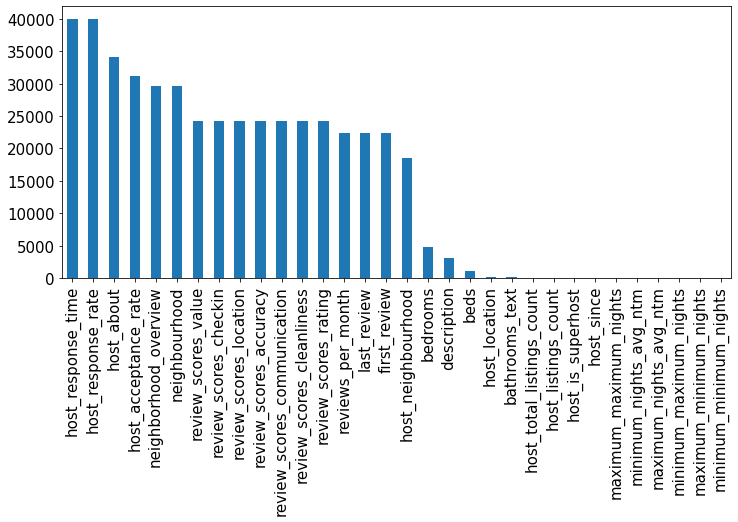

In [32]:
# Number of recods missing
missing_featrues = mtool.missing_data_size(df, figsize=(12, 5))

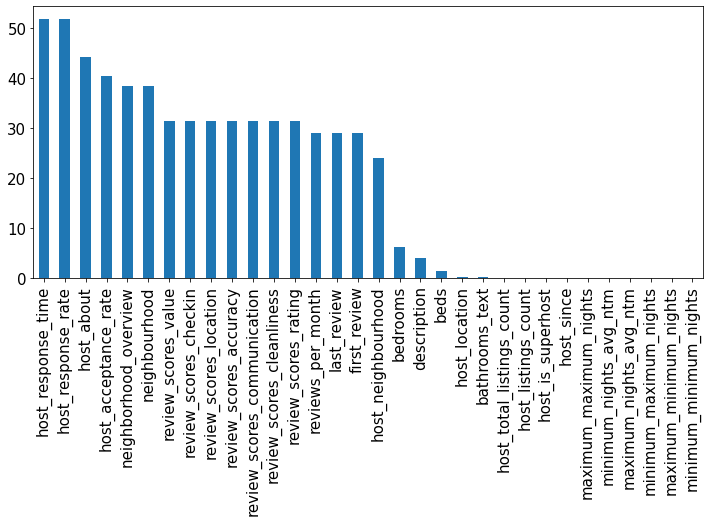

In [33]:
# Percetage of recods missing
missing_feature_percetage = mtool.missing_data_percentage(df, missing_featrues, figsize=(12, 5))

In [34]:
missing_feature_percetage.head()

Total    Percent  total not missing
host_response_time     39950  51.791641              37186
host_response_rate     39950  51.791641              37186
host_about             34075  44.175223              43061
host_acceptance_rate   31154  40.388405              45982
neighborhood_overview  29699  38.502126              47437

In [35]:
missing_cat = [var for var in missing_feature_percetage.index if var in categorical]

In [36]:
missing_feature_percetage.loc[missing_cat]

Total    Percent  total not missing
host_response_time     39950  51.791641              37186
host_about             34075  44.175223              43061
neighborhood_overview  29699  38.502126              47437
neighbourhood          29698  38.500830              47438
host_neighbourhood     18562  24.063991              58574
description             3088   4.003319              74048
host_location            223   0.289100              76913
bathrooms_text           180   0.233354              76956

We can see from here that the top 5 variables have more missing data. However, that missing data give information of which listing have more information on descripting variables that will be useful for the second model. The lack of information of, for example neighborhood_overview, might or not be correlated with the reviews. That is something that can be explored.

In [37]:
missing_num = [var for var in missing_feature_percetage.index if var in numerical]

In [38]:
missing_feature_percetage.loc[missing_num]

Total    Percent  total not missing
host_response_rate           39950  51.791641              37186
host_acceptance_rate         31154  40.388405              45982
review_scores_value          24281  31.478168              52855
review_scores_checkin        24281  31.478168              52855
review_scores_location       24280  31.476872              52856
review_scores_accuracy       24234  31.417237              52902
review_scores_communication  24232  31.414644              52904
review_scores_cleanliness    24225  31.405569              52911
review_scores_rating         24171  31.335563              52965
reviews_per_month            22431  29.079807              54705
bedrooms                      4852   6.290189              72284
beds                          1144   1.483095              75992
host_total_listings_count       41   0.053153              77095
host_listings_count             41   0.053153              77095
host_is_superhost               41   0.053153              77095
maximum_maximum_nights           1   0.001296              77135
minimum_nights_avg_ntm           1   0.001296              77135
maximum_nights_avg_ntm           1   0.001296              77135
minimum_maximum_nights           1   0.001296              77135
maximum_minimum_nights           1   0.001296              77135
minimum_minimum_nights           1   0.001296              77135

As before, the top 10 variables have more numerical data that can have a meaning. They are related to the reviews and acceptance and response rate of host. they can be used to contruct the new variable for the second model.
Most of the variables that can be used for the first model, those realated to the property itself (including location and amenities), have data.

## Variable extraction, cleaning, and encoding

**Variable cleaning and separation into two variables**

The *bathrooms_text* variable comprehend infomration numerical and categorical summarised in strings. So we can separate the information into two variables: bathrooms and bathrooms_types.

In [39]:
df['bathrooms_text'].head()

0            1 bath
1     1 shared bath
2            1 bath
3           2 baths
4    1 private bath
Name: bathrooms_text, dtype: object

In [40]:
# Extracting the number of bathroms
df['bathrooms'] = df['bathrooms_text'].str.split(" ").str[0]

In [41]:
df['bathrooms'].head()

0    1
1    1
2    1
3    2
4    1
Name: bathrooms, dtype: object

In [42]:
df['bathrooms'].value_counts()

1            52562
2            10542
1.5           8714
2.5           2255
3             1321
3.5            496
0              318
4              250
Half-bath      107
Shared         105
4.5             99
5               53
6               40
Private         22
5.5             20
10              18
6.5              8
7                7
8                7
9                2
7.5              2
8.5              2
11               1
12               1
17               1
10.5             1
35               1
11.5             1
Name: bathrooms, dtype: int64

It still needs further cleaning, so when it says hall-bath it will be 0.5, and Private and Shared equal to 1.

In [43]:
df['bathrooms_text'].head(12)

0               1 bath
1        1 shared bath
2               1 bath
3              2 baths
4       1 private bath
5     1.5 shared baths
6       1 private bath
7            1.5 baths
8       0 shared baths
9               1 bath
10      1 private bath
11                 NaN
Name: bathrooms_text, dtype: object

In [44]:
df.loc[df['bathrooms'].str.contains('Half-bath').fillna(False), 'bathrooms'] = 0.5

In [45]:
df.loc[df['bathrooms'].str.contains('Private').fillna(False), 'bathrooms'] = 1.0
df.loc[df['bathrooms'].str.contains('Shared').fillna(False), 'bathrooms'] = 1.0

In [46]:
df['bathrooms'] = df['bathrooms'].astype(float)

In [47]:
# now it is clean
df['bathrooms'].value_counts()

1.0     52689
2.0     10542
1.5      8714
2.5      2255
3.0      1321
3.5       496
0.0       318
4.0       250
0.5       107
4.5        99
5.0        53
6.0        40
5.5        20
10.0       18
6.5         8
7.0         7
8.0         7
9.0         2
8.5         2
7.5         2
12.0        1
11.0        1
17.0        1
35.0        1
11.5        1
10.5        1
Name: bathrooms, dtype: int64

In [48]:
# Making a new variable to indicate if bathroom is shared
df['bathrooms_shared'] = df['bathrooms_text'].str.contains('shared').astype(float)

In [49]:
df['bathrooms_shared'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: bathrooms_shared, dtype: float64

In [50]:
# remove string variable
del df['bathrooms_text']

**Cleaning ammenties and variable creation**

Getting a new variables given the number of amenities

In [51]:
df['amenities'].head()

0    ["Refrigerator", "Kitchen", "Crib", "Dedicated...
1    ["Long term stays allowed", "Lock on bedroom d...
2    ["Refrigerator", "Wifi", "Heating", "Dishes an...
3    ["Long term stays allowed", "Elevator", "Heati...
4    ["TV", "Hair dryer", "Lock on bedroom door", "...
Name: amenities, dtype: object

In [52]:
# The string of amenities is in a list form, so we used a literal evaluation
# to count the len of the list with the amenities of the listing.
df['number_amenities'] = df['amenities'].apply(ast.literal_eval).apply(len)

In [53]:
df['number_amenities'].head()

0    28
1    41
2    24
3    27
4    16
Name: number_amenities, dtype: int64

Extracting the amenties and look which are more common.

In [54]:
df['amenities'].iloc[1]

'["Long term stays allowed", "Lock on bedroom door", "Room-darkening shades", "Heating", "Extra pillows and blankets", "Refrigerator", "Children\\u2019s dinnerware", "Fire extinguisher", "Iron", "Smoke alarm", "TV", "Patio or balcony", "Luggage dropoff allowed", "Children\\u2019s books and toys", "Washer", "Oven", "Dishes and silverware", "Hangers", "Bathtub", "Essentials", "Wifi", "Hot water", "Babysitter recommendations", "Cooking basics", "Bed linens", "Stove", "Dedicated workspace", "Pack \\u2019n Play/travel crib", "Coffee maker", "Host greets you", "Crib", "Dryer", "Paid parking off premises", "Outlet covers", "Kitchen", "Hair dryer", "Carbon monoxide alarm", "Shampoo", "Free street parking", "Cable TV", "Ethernet connection"]'

In [55]:
df['amenities_1'] = df['amenities'].str.replace("'", '').apply(ast.literal_eval)

In [56]:
df['amenities_1'].head()

0    [Refrigerator, Kitchen, Crib, Dedicated worksp...
1    [Long term stays allowed, Lock on bedroom door...
2    [Refrigerator, Wifi, Heating, Dishes and silve...
3    [Long term stays allowed, Elevator, Heating, M...
4    [TV, Hair dryer, Lock on bedroom door, Carbon ...
Name: amenities_1, dtype: object

In [57]:
df['amenities_1'].iloc[0]

['Refrigerator',
 'Kitchen',
 'Crib',
 'Dedicated workspace',
 'Lockbox',
 'Stove',
 'Carbon monoxide alarm',
 'Iron',
 'Cable TV',
 'Wifi',
 'Long term stays allowed',
 'Fire extinguisher',
 'Smoke alarm',
 'Hot water',
 'Heating',
 'Paid parking off premises',
 'Washer',
 'Essentials',
 'High chair',
 'TV',
 'Hangers',
 'Coffee maker',
 'Oven',
 'Pack ’n Play/travel crib',
 'Hair dryer',
 'Microwave',
 'Cooking basics',
 'Dishes and silverware']

In [58]:
# Conter is an object that will keep the cout an amenity appers
amenities_counts = collections.Counter()

In [59]:
# collecting all the amenities in a single list
all_amenities_records = []
for idx in range(0, df.shape[0]):
    all_amenities_records.extend(df['amenities_1'].iloc[idx])

In [60]:
len(all_amenities_records)

1428020

In [61]:
for amenity in all_amenities_records:
    amenities_counts[amenity] += 1

In [62]:
amenities_counts

Counter({'Refrigerator': 32475,
         'Kitchen': 69894,
         'Crib': 3174,
         'Dedicated workspace': 47440,
         'Lockbox': 8675,
         'Stove': 25890,
         'Carbon monoxide alarm': 45030,
         'Iron': 57889,
         'Cable TV': 11616,
         'Wifi': 73601,
         'Long term stays allowed': 16838,
         'Fire extinguisher': 24581,
         'Smoke alarm': 65911,
         'Hot water': 43554,
         'Heating': 72415,
         'Paid parking off premises': 9907,
         'Washer': 65380,
         'Essentials': 70987,
         'High chair': 3842,
         'TV': 52656,
         'Hangers': 60296,
         'Coffee maker': 16877,
         'Oven': 28622,
         'Pack ’n Play/travel crib': 3244,
         'Hair dryer': 51696,
         'Microwave': 27369,
         'Cooking basics': 28737,
         'Dishes and silverware': 31743,
         'Lock on bedroom door': 12831,
         'Room-darkening shades': 2842,
         'Extra pillows and blankets': 13235,
       

In [63]:
# We will take the top ones of the total 
len(amenities_counts)

631

In [64]:
# Getting data frame with the frequency of occurance and percetage of occurance
df_amenities_count = pd.Series(amenities_counts).to_frame('occurance')

In [65]:
df_amenities_count['occurance%'] = df_amenities_count['occurance'] / df_amenities_count['occurance'].sum() * 100

In [66]:
df_amenities_count = df_amenities_count.sort_values(by=['occurance%'], ascending=False)

In [67]:
df_amenities_count.head(40)

occurance  occurance%
Wifi                            73601    5.154059
Heating                         72415    5.071007
Essentials                      70987    4.971009
Kitchen                         69894    4.894469
Smoke alarm                     65911    4.615552
Washer                          65380    4.578367
Hangers                         60296    4.222350
Iron                            57889    4.053795
TV                              52656    3.687343
Hair dryer                      51696    3.620117
Shampoo                         49871    3.492318
Dedicated workspace             47440    3.322082
Carbon monoxide alarm           45030    3.153317
Hot water                       43554    3.049957
Dryer                           33988    2.380079
Refrigerator                    32475    2.274128
Dishes and silverware           31743    2.222868
Cooking basics                  28737    2.012367
Oven                            28622    2.004314
Bed linens                      27449    1.922172
Microwave                       27369    1.916570
Stove                           25890    1.813000
Fire extinguisher               24581    1.721334
First aid kit                   24148    1.691013
Private entrance                18885    1.322460
Dishwasher                      18547    1.298791
Coffee maker                    16877    1.181846
Long term stays allowed         16838    1.179115
Elevator                        15493    1.084929
Free parking on premises        15140    1.060209
Extra pillows and blankets      13235    0.926808
Lock on bedroom door            12831    0.898517
Host greets you                 12232    0.856571
Cable TV                        11616    0.813434
Luggage dropoff allowed         11215    0.785353
Patio or balcony                10904    0.763575
Garden or backyard              10864    0.760774
Breakfast                       10184    0.713155
Paid parking off premises        9907    0.693758
Lockbox                          8675    0.607484

We can see the frequncy of occurance of each amenity inf the data set. It will be taken those that havemore than 0.5% as cuttof. This list also have occurance of some other names for simmilar amenties, like 'Wifi' and ''Wifi – 70 Mbps', but the latter just occure 2 time. Some of them aretoo specific and want general tags. Few occurances will not make significative differences when counting as an amenity feature.

In [68]:
amenites_list = list(df_amenities_count.loc[df_amenities_count['occurance%'] >= 0.5].index)
len(amenites_list)

42

In [69]:
# add as one-hot-encoding the parricular amenties
df = df.copy()
dict_replace = {}
for amenity in amenites_list:
    df[amenity] = 0.0
    df[amenity] = df['amenities_1'].apply(lambda x: amenity in x)
    df[amenity] = df[amenity].astype(float)
    dict_replace[amenity] = amenity.lower().replace(" ","_")

In [70]:
df = df.rename(columns=dict_replace)

In [71]:
df.head()

id                                        description  \
0  11551  Unlike most rental apartments out there my fla...   
1  13913  My bright double bedroom with a large window h...   
2  15400  Lots of windows and light.  St Luke's Gardens ...   
3  17402  You'll have a wonderful stay in this superb mo...   
4  17506  Enjoy a chic stay in this elegant but fully mo...   

                               neighborhood_overview  \
0  Not even 10 minutes by metro from Victoria Sta...   
1  Finsbury Park is a friendly melting pot commun...   
2                                     It is Chelsea.   
3  Location, location, location! You won't find b...   
4  Fulham is 'villagey' and residential – a real ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7afccf4-18e5...    43039   
1  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
2  https://a0.muscache.com/pictures/428392/462d26...    60302   
3  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   
4  https://a0.muscache.com/pictures/11901327/e63d...    67915   

                                  host_url host_since  \
0  https://www.airbnb.com/users/show/43039 2009-10-03   
1  https://www.airbnb.com/users/show/54730 2009-11-16   
2  https://www.airbnb.com/users/show/60302 2009-12-05   
3  https://www.airbnb.com/users/show/67564 2010-01-04   
4  https://www.airbnb.com/users/show/67915 2010-01-05   

                         host_location  \
0      London, England, United Kingdom   
1      London, England, United Kingdom   
2  Kensington, England, United Kingdom   
3      London, England, United Kingdom   
4      London, England, United Kingdom   

                                          host_about  host_response_time  \
0  Hello, I'm a friendly Italian man with a very ...      within an hour   
1  I am a Multi-Media Visual Artist and Creative ...  within a few hours   
2  English, grandmother,  I have travelled quite ...                 NaN   
3  We are Liz and Jack.  We manage a number of ho...  a few days or more   
4  Named best B&B by The Times. Easy going hosts,...                 NaN   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0               100.0                  90.0                0.0   
1               100.0                  75.0                0.0   
2                 NaN                 100.0                0.0   
3                 0.0                 100.0                1.0   
4                 NaN                   NaN                0.0   

  host_neighbourhood  host_listings_count  host_total_listings_count  \
0            Brixton                  3.0                        3.0   
1    LB of Islington                  3.0                        3.0   
2            Chelsea                  1.0                        1.0   
3          Fitzrovia                 18.0                       18.0   
4             Fulham                  3.0                        3.0   

                                  host_verifications  \
0  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
1  ['email', 'phone', 'facebook', 'reviews', 'off...   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...   
3  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
4  ['email', 'phone', 'jumio', 'selfie', 'governm...   

                               neighbourhood  neighbourhood_cleansed  \
0                     London, United Kingdom                 Lambeth   
1  Islington, Greater London, United Kingdom               Islington   
2                     London, United Kingdom  Kensington and Chelsea   
3          London, Fitzrovia, United Kingdom             Westminster   
4                     London, United Kingdom  Hammersmith and Fulham   

   latitude  longitude              property_type        room_type  \
0  51.46225   -0.11732           Entire apartment  Entire home/apt   
1  51.56802   -0.11121  Private room in apartment     Private room   
2  51.48796   -0.16898           Ent

**Encoding property type data**

The 'property_type' is granular variable with repetitve information. The valuable infomation from this variable is also found and summarised in the 'room_type' variable. This can be use isted and has 4 categories. Therefore, an Integer Encoding will be used. In this case the categories are nominal sice they do not have an inherent order.

In [72]:
df['property_type'].value_counts(dropna=False).head(10)

Entire apartment                     32292
Private room in apartment            17926
Private room in house                11111
Entire house                          5618
Private room in townhouse             1529
Entire condominium                    1349
Entire serviced apartment             1026
Entire townhouse                       963
Private room in condominium            656
Private room in bed and breakfast      538
Name: property_type, dtype: int64

In [73]:
df['room_type'].value_counts(dropna=False)

Entire home/apt    42395
Private room       33558
Shared room          603
Hotel room           580
Name: room_type, dtype: int64

In [74]:
map_room_type = {'Entire home/apt':1, 'Private room':2, 'Shared room':3, 'Hotel room':4}
df['room_type_num'] = df['room_type'].map(map_room_type)
df['room_type_num'].value_counts(dropna=False)

1    42395
2    33558
3      603
4      580
Name: room_type_num, dtype: int64

## Creating variables from datetime variables

In [75]:
df[['host_since', 'first_review', 'last_review']].head()

host_since first_review last_review
0 2009-10-03   2010-03-21  2020-03-26
1 2009-11-16   2010-08-18  2020-02-22
2 2009-12-05   2009-12-21  2020-03-16
3 2010-01-04   2011-03-21  2019-11-02
4 2010-01-05          NaT         NaT

In [76]:
df['host_since'].max()

Timestamp('2020-12-15 00:00:00')

In [77]:
df['host_since'].min()

Timestamp('2008-08-14 00:00:00')

In [78]:
# Months Since first review (dtype date time)
df['M_since_first_reviews'] = df.first_review.dt.to_period('M') - df.host_since.dt.to_period('M')

In [79]:
df['M_since_first_reviews'].head()

0     <5 * MonthEnds>
1     <9 * MonthEnds>
2     <0 * MonthEnds>
3    <14 * MonthEnds>
4                 NaT
Name: M_since_first_reviews, dtype: object

In [80]:
def ts_time(df, name_var):
    """
    Function to get the numerical value of all the TS variables
    param df: data frame
    param name_var: string with name of the variable
    """
    df.loc[~df[name_var].isnull(), name_var] = df.loc[~df[name_var].isnull(), name_var].apply(lambda x: x.n)
    df.loc[df[name_var].isnull(), name_var] = np.nan

In [81]:
ts_time(df, 'M_since_first_reviews')

In [82]:
df['M_since_first_reviews'].head()

0      5
1      9
2      0
3     14
4    NaN
Name: M_since_first_reviews, dtype: object

In [83]:
# Getting an integer dtype 
df['M_since_first_reviews'].astype(float)
df.loc[df['M_since_first_reviews'] >= 0, 'months_since_first_reviews'] = df['M_since_first_reviews']

In [84]:
del df['M_since_first_reviews']

In [85]:
df['months_since_first_reviews'] = df['months_since_first_reviews'].astype(float)

In [86]:
df['months_since_first_reviews'].head()

0     5.0
1     9.0
2     0.0
3    14.0
4     NaN
Name: months_since_first_reviews, dtype: float64

In [87]:
# Months with reviews (dtype date time)
df['M_with_reviews'] = df.last_review.dt.to_period('M') - df.first_review.dt.to_period('M')

In [88]:
df['M_with_reviews'].head()

0    <120 * MonthEnds>
1    <114 * MonthEnds>
2    <123 * MonthEnds>
3    <104 * MonthEnds>
4                  NaT
Name: M_with_reviews, dtype: object

In [89]:
ts_time(df, 'M_with_reviews')

In [90]:
# Getting an integer dtype 
df['M_with_reviews'].astype(float)
df.loc[df['M_with_reviews'] >= 0, 'months_with_reviews'] = df['M_with_reviews']

In [91]:
del df['M_with_reviews']

In [92]:
df['months_with_reviews'] = df['months_with_reviews'].astype(float)

In [93]:
df['months_with_reviews'].head()

0    120.0
1    114.0
2    123.0
3    104.0
4      NaN
Name: months_with_reviews, dtype: float64

In [94]:
# the maximum date in the 'host_since' is 2020-12-15, so we have data until December 2020
df['months_as_host_1'] = pd.to_datetime('2020/12/31').to_period('M') - df.host_since.dt.to_period('M')

In [95]:
df['months_as_host_1'] = pd.to_datetime('2020/12/31').to_period('M') - df.host_since.dt.to_period('M').head()

In [96]:
ts_time(df, 'months_as_host_1')

In [97]:
# Getting an integer dtype 
df['months_as_host_1'].astype(float)
df.loc[df['months_as_host_1'] >= 0, 'months_as_host'] = df['months_as_host_1']

In [98]:
del df['months_as_host_1']

In [99]:
df['months_as_host'] = df['months_as_host'].astype(float)

In [100]:
df['host_sice_YYYY'] = df.host_since.dt.year

In [101]:
df['first_review_YYYY'] = df.first_review.dt.year

In [102]:
df['last_review_YYYY'] = df.last_review.dt.year

In [103]:
df.head()

id                                        description  \
0  11551  Unlike most rental apartments out there my fla...   
1  13913  My bright double bedroom with a large window h...   
2  15400  Lots of windows and light.  St Luke's Gardens ...   
3  17402  You'll have a wonderful stay in this superb mo...   
4  17506  Enjoy a chic stay in this elegant but fully mo...   

                               neighborhood_overview  \
0  Not even 10 minutes by metro from Victoria Sta...   
1  Finsbury Park is a friendly melting pot commun...   
2                                     It is Chelsea.   
3  Location, location, location! You won't find b...   
4  Fulham is 'villagey' and residential – a real ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7afccf4-18e5...    43039   
1  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
2  https://a0.muscache.com/pictures/428392/462d26...    60302   
3  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   
4  https://a0.muscache.com/pictures/11901327/e63d...    67915   

                                  host_url host_since  \
0  https://www.airbnb.com/users/show/43039 2009-10-03   
1  https://www.airbnb.com/users/show/54730 2009-11-16   
2  https://www.airbnb.com/users/show/60302 2009-12-05   
3  https://www.airbnb.com/users/show/67564 2010-01-04   
4  https://www.airbnb.com/users/show/67915 2010-01-05   

                         host_location  \
0      London, England, United Kingdom   
1      London, England, United Kingdom   
2  Kensington, England, United Kingdom   
3      London, England, United Kingdom   
4      London, England, United Kingdom   

                                          host_about  host_response_time  \
0  Hello, I'm a friendly Italian man with a very ...      within an hour   
1  I am a Multi-Media Visual Artist and Creative ...  within a few hours   
2  English, grandmother,  I have travelled quite ...                 NaN   
3  We are Liz and Jack.  We manage a number of ho...  a few days or more   
4  Named best B&B by The Times. Easy going hosts,...                 NaN   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0               100.0                  90.0                0.0   
1               100.0                  75.0                0.0   
2                 NaN                 100.0                0.0   
3                 0.0                 100.0                1.0   
4                 NaN                   NaN                0.0   

  host_neighbourhood  host_listings_count  host_total_listings_count  \
0            Brixton                  3.0                        3.0   
1    LB of Islington                  3.0                        3.0   
2            Chelsea                  1.0                        1.0   
3          Fitzrovia                 18.0                       18.0   
4             Fulham                  3.0                        3.0   

                                  host_verifications  \
0  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
1  ['email', 'phone', 'facebook', 'reviews', 'off...   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...   
3  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
4  ['email', 'phone', 'jumio', 'selfie', 'governm...   

                               neighbourhood  neighbourhood_cleansed  \
0                     London, United Kingdom                 Lambeth   
1  Islington, Greater London, United Kingdom               Islington   
2                     London, United Kingdom  Kensington and Chelsea   
3          London, Fitzrovia, United Kingdom             Westminster   
4                     London, United Kingdom  Hammersmith and Fulham   

   latitude  longitude              property_type        room_type  \
0  51.46225   -0.11732           Entire apartment  Entire home/apt   
1  51.56802   -0.11121  Private room in apartment     Private room   
2  51.48796   -0.16898           Ent

# EDA

## Analysing the price per night 

The objective of the first model is to model to advise their clients on how to set a competitive price for their first listing on Airbnb. Therefore, let's first to understand a bit of it's statistics in the data set.

In [385]:
mtool.stats_summary(df[['price']]).T

price
count   77136.000000
mean      120.569765
std       412.539464
min         0.000000
25%        44.000000
50%        75.000000
75%       127.000000
max     18175.000000
median     75.000000
skew       35.292880
kurt     1430.166525

In [105]:
df['price'].isnull().any()

False

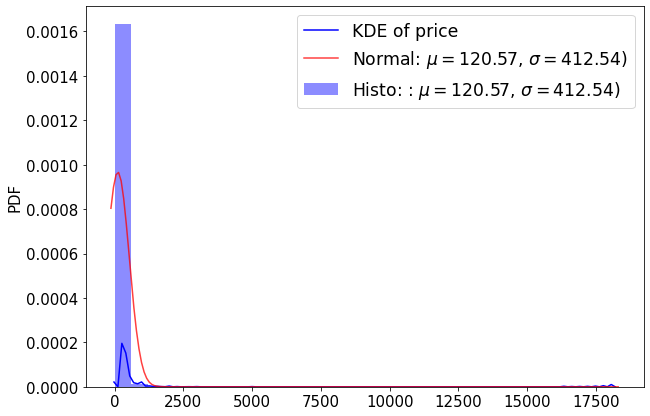

In [106]:
mtool.plotting_one_dist_norm_kde(df, 'price')
None

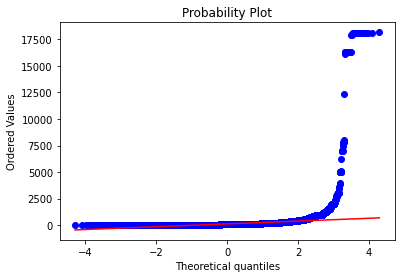

In [107]:
mtool.q_q_plotting(df, 'price')
None

Edit: For the probability plot, the red line represents those points which would have been plotted for y-axis points if those were normally distributed. But the blue points represents the actual scenario. We can see that there is a lot of deviation on the both the ends i.e on the top right and bottom left.

<AxesSubplot:xlabel='price'>

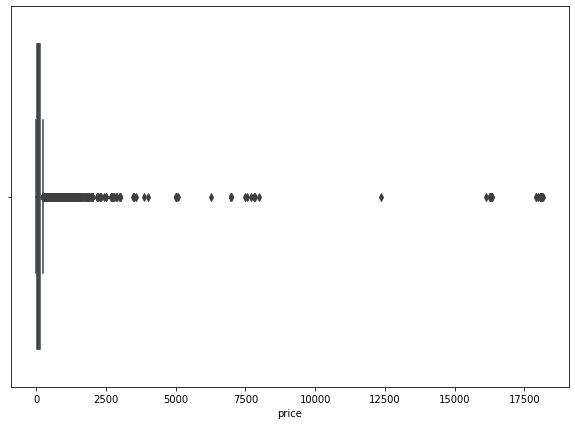

In [108]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(df['price'], ax=ax)

From these plots it can be seen a number of ourliers that go to very high prices. As well, we see observations that have price set to zero. So, let' see how many they are in the data set. 

In [109]:
# just 22 observations that we can remove
df[df['price'] == 0].shape

(22, 112)

In [110]:
# pricess less thatn £2,000, 
df[df['price'] <= 1000].shape

(76847, 112)

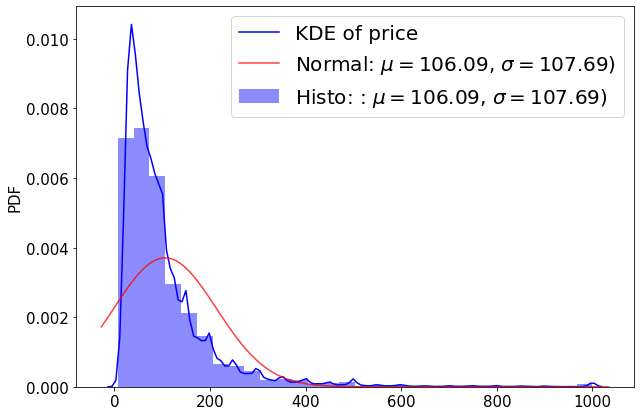

In [387]:
mask_00 = (df['price'] != 0) & (df['price'] <= 1000)
mtool.plotting_one_dist_norm_kde(df[mask_00], 'price', fontsize_leg=20)
None

In [388]:
mtool.stats_summary(df.loc[mask_00, ['price']]).T

price
count   76825.000000
mean      106.090939
std       107.690466
min         7.000000
25%        44.000000
50%        75.000000
75%       125.000000
max      1000.000000
median     75.000000
skew        3.679605
kurt       20.019029

In [112]:
df[df['price'] > 600].shape

(907, 112)

In [113]:
df[df['price'] > 600].shape[0] / df.shape[0] * 100

1.1758452603194358

In [114]:
df[df['price'] > 2000].shape

(99, 112)

In [115]:
df[df['price'] > 2000].shape[0] / df.shape[0] * 100

0.12834474175482266

In [116]:
df[(df['price'] > 600) & (df['price'] <=2000)].shape

(808, 112)

In [117]:
df[(df['price'] > 600) & (df['price'] <=2000)].shape[0] / df.shape[0] * 100 

1.0475005185646131

In [118]:
df[df['price'] < 10].shape

(38, 112)

In [119]:
df[df['price'] < 10].shape[0] / df.shape[0] * 100

0.04926363824932587

In [120]:
df[df['price'] < 15].shape

(189, 112)

In [121]:
df[df['price'] < 17].shape[0] / df.shape[0] * 100

0.5522713130056005

In [122]:
df[df['price'] < 17].shape

(426, 112)

In [123]:
df[df['price'] < 20].shape[0] / df.shape[0] * 100

1.2484443061605475

Let's investigate what type of properties are some of the outliers first:

In [124]:
df[df['price'] > 2000].groupby(['room_type', 'neighbourhood_cleansed', 'review_scores_rating', 'months_as_host'])['number_of_reviews'].sum().to_frame()

Empty DataFrame
Columns: [number_of_reviews]
Index: []

These outliers accounts for the 0.12% and have the lisitng for more than 5 years most of the cases. Are well stablished and rent the whole property or private room.

In [125]:
df[(df['price'] > 600) & (df['price'] <=2000)].groupby(['room_type', 'neighbourhood_cleansed', 'review_scores_rating', 'months_as_host'])['number_of_reviews'].sum().to_frame()

Empty DataFrame
Columns: [number_of_reviews]
Index: []

This group repesent 1.05% of the observations with customer that have the listing since a year, 2 yers, and some with more than 5 years.

If we remove the those listing with price over £600 we just lose 1.2% of the records, so they won't be deteminat for our prediction.

In [126]:
df[df['price'] <= 17].groupby(['room_type', 'neighbourhood_cleansed', 'review_scores_rating', 'months_as_host'])['number_of_reviews'].sum().to_frame()

Empty DataFrame
Columns: [number_of_reviews]
Index: []

They are just considered representing 0.55% of the records, they are ouliers that could give a non competitive price for the first time listing.

From the above plots, we can observe that the Sales Price is not normally distributed. From the boxplot we can observe that the dataset have a number of outliers

In [127]:
mask_0 = (df['price'] > 10) & (df['price'] < 600)
mtool.plotting_one_dist_norm_kde(df[mask_0], 'price')
None

In [384]:
mtool.stats_summary(df.loc[mask_0, ['price']]).T

price
count   76114.000000
mean      100.025690
std        84.676740
min        11.000000
25%        43.000000
50%        75.000000
75%       124.000000
max       599.000000
median     75.000000
skew        2.232381
kurt        6.332932

In [129]:
mtool.q_q_plotting(df[mask_0], 'price')
None

* Deviates from the normal distribution.
* Has appreciable positive skewness.
* Shows peakedness(Kurtosis).


Edit:Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution.

Here we can observe that the value of skewness is quite high which means that there is a large amount of asymmetry.

The peak of the histogram represents the mode i.e the price for which maximum number of houses were sold.

What kind of skewness is present in the given case?

As the mean of the feature is greater than the median which is greater than the mode and the line is flat towards the right in the histogram, the given feature is Positively Skewed. Most of the houses were sold less than the average price.

In [130]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(df.loc[mask_0,'price'], ax=ax)

<AxesSubplot:xlabel='price'>

Edit: Now let's make sure that the target variable follows a normal distribution. In order to make a feature follow normal distribution, we will perform log transformation.

In [131]:
df_c = df.copy()
mask_0 = (df_c['price'] > 10) & (df_c['price'] < 600)
df_c = df_c[mask_0]
df_c['price_log'] = np.log(df_c['price'])

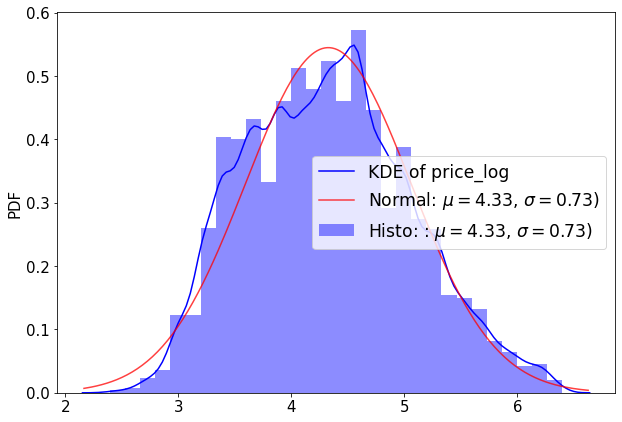

In [132]:
mtool.plotting_one_dist_norm_kde(df_c, 'price_log')
None

In [389]:
mtool.stats_summary(df_c[['price_log']]).T

price_log
count   76114.000000
mean        4.327777
std         0.732286
min         2.397895
25%         3.761200
50%         4.317488
75%         4.820282
max         6.395262
median      4.317488
skew        0.238069
kurt       -0.435039

In [134]:
# standard deviation price
np.exp(0.73)

2.0750806076741224

Negative kurtosis means that your distribution is flatter than a normal curve with the same mean and standard deviation.

In [135]:
mtool.q_q_plotting(df_c, 'price_log')
None

In [136]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(df_c['price_log'], ax=ax)

<AxesSubplot:xlabel='price_log'>

Edit: We can observe that the SalesPrice feature now follows a normal distibution as the Histogram resembles bell-shape and the QQ-plot also overlaps with the red line. Let's again plot the scatter plot for GrLivArea and SalePrice to see whether Heteroscedasticity was removed.

In [137]:
df_c.shape

(76114, 113)

In [138]:
# When removig the outliers we have 98.7% of the origunal data. 
df_c.shape[0] / df.shape[0] * 100

98.6750674133997

In [138]:
# df_c.to_csv(os.path.join(path_input, 'extended_data_set.csv'))

In [139]:
# df_c.to_pickle(os.path.join(path_input, 'extended_data_set.pickle'))

As test, what happens if we do not remove outliers but we do transform the price to log (we used log(1 +x) since we have zero in the price):

In [139]:
df_1 = df.copy()
df_1['price_log'] = np.log1p(df_1['price'])

In [140]:
mtool.plotting_one_dist_norm_kde(df_1, 'price_log')
None

In [141]:
#skewness and kurtosis
print("Skewness: %f" % df_1['price_log'].skew())
print("Kurtosis: %f" % df_1['price_log'].kurt())

Skewness: 0.637060
Kurtosis: 1.767047


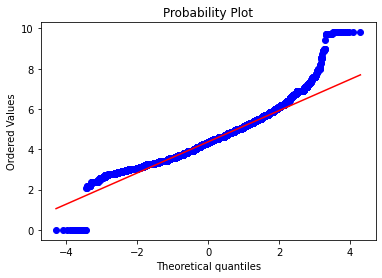

In [142]:
mtool.q_q_plotting(df_1, 'price_log')
None

<AxesSubplot:xlabel='price_log'>

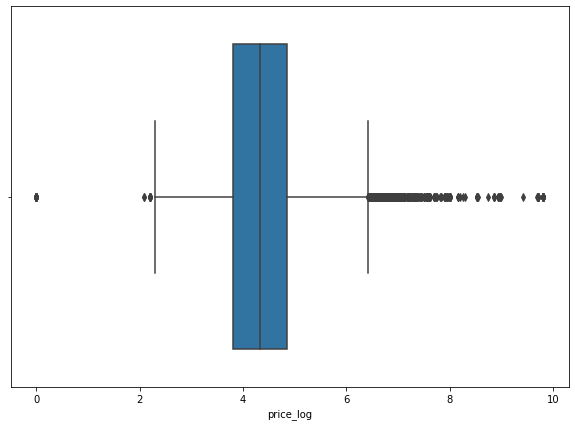

In [143]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(df_1['price_log'], ax=ax)

## Analysing relationship of price with variables that we can use in the model

* I will use the data set for which the outliers are removed, and we get a more gaussian shape distribution.
* The variables related to the property will be analised first agiant the actual price/log price

In [144]:
var_set_1 = [
'price',
'price_log',
'latitude',
'longitude',
'accommodates',
'bedrooms',
'beds',
'minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm',
'has_availability',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'bathrooms',
'bathrooms_shared',
'number_amenities',
'room_type_num']

var_amenties = ['wifi',
'heating',
'essentials',
'kitchen',
'smoke_alarm',
'washer',
'hangers',
'iron',
'tv',
'hair_dryer',
'shampoo',
'dedicated_workspace',
'carbon_monoxide_alarm',
'hot_water',
'dryer',
'refrigerator',
'dishes_and_silverware',
'cooking_basics',
'oven',
'bed_linens',
'microwave',
'stove',
'fire_extinguisher',
'first_aid_kit',
'private_entrance',
'dishwasher',
'coffee_maker',
'long_term_stays_allowed',
'elevator',
'free_parking_on_premises',
'extra_pillows_and_blankets',
'lock_on_bedroom_door',
'host_greets_you',
'cable_tv',
'luggage_dropoff_allowed',
'patio_or_balcony',
'garden_or_backyard',
'breakfast',
'paid_parking_off_premises',
'lockbox',
'free_street_parking',
'bathtub']

var_year = ['host_sice_YYYY', 'first_revie_YYYY', 'last_review_YYYY']


Some variables culd not have a linear relationships between them. Therefore, to measure the correlation between two variables, even their monotonically relationship is not linear, we used ht e Spearman correlation.

In [145]:
corr_spear_set_1 = df_c[var_set_1].corr(method='spearman').abs()

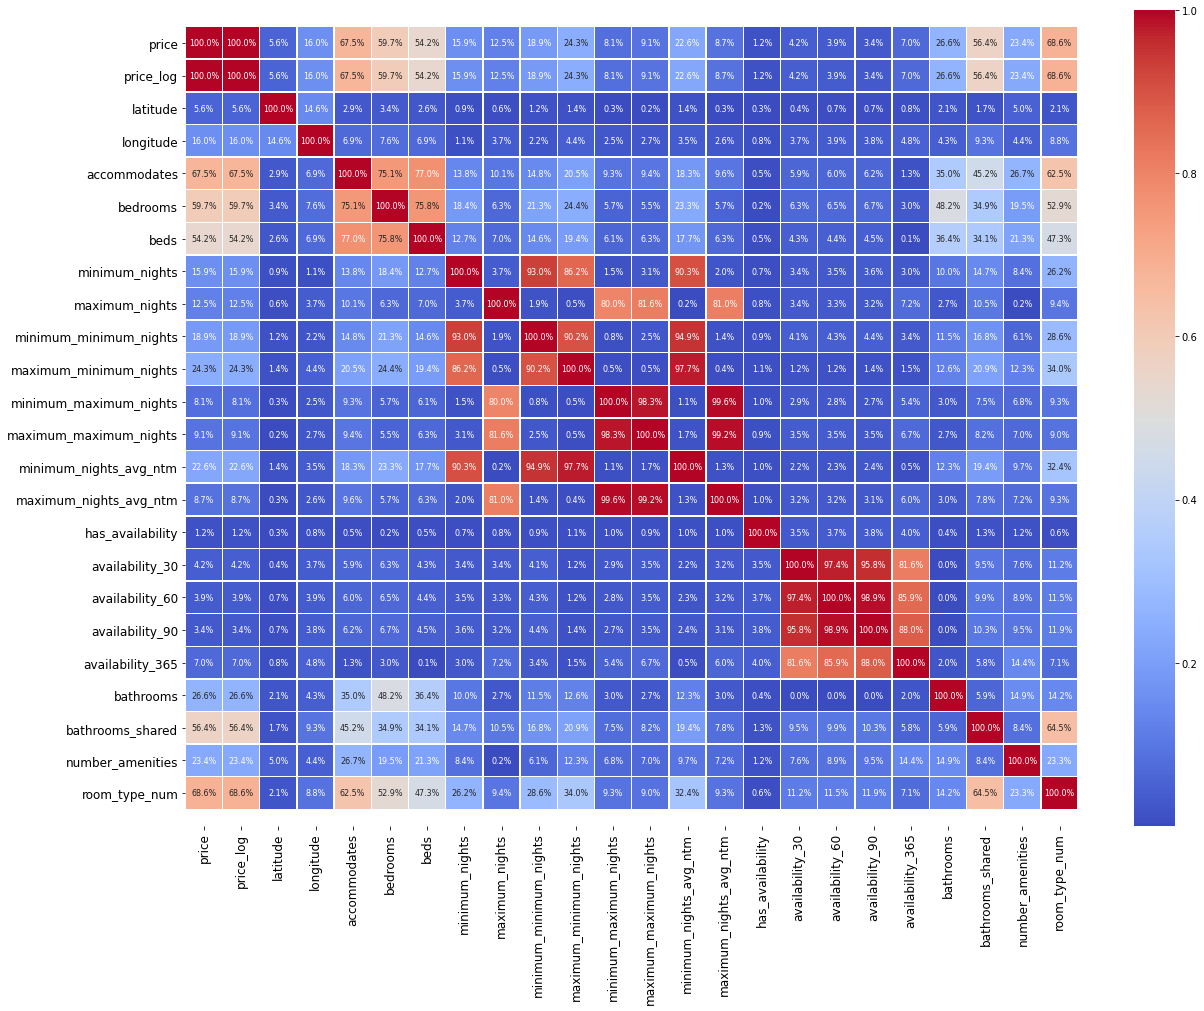

In [146]:
mtool.heat_map_corr(corr_spear_set_1, cmap='coolwarm', square=False, annot=True)

In [147]:
corr_spear_amenities = df_c[['price', 'number_amenities'] + var_amenties].corr(method='spearman').abs()

In [148]:
mtool.heat_map_corr(corr_spear_amenities, cmap='coolwarm', square=False, annot=True, figsize=(25,18))

In [273]:
# data_set = os.path.join(path_input, 'extended_data_set.pickle')
# df_c = pd.read_pickle(data_set)

**Looking at the type of properties in the data set**

In [154]:
plt.rcParams.update({'font.size': 18})

Text(0, 0.5, 'Counts')

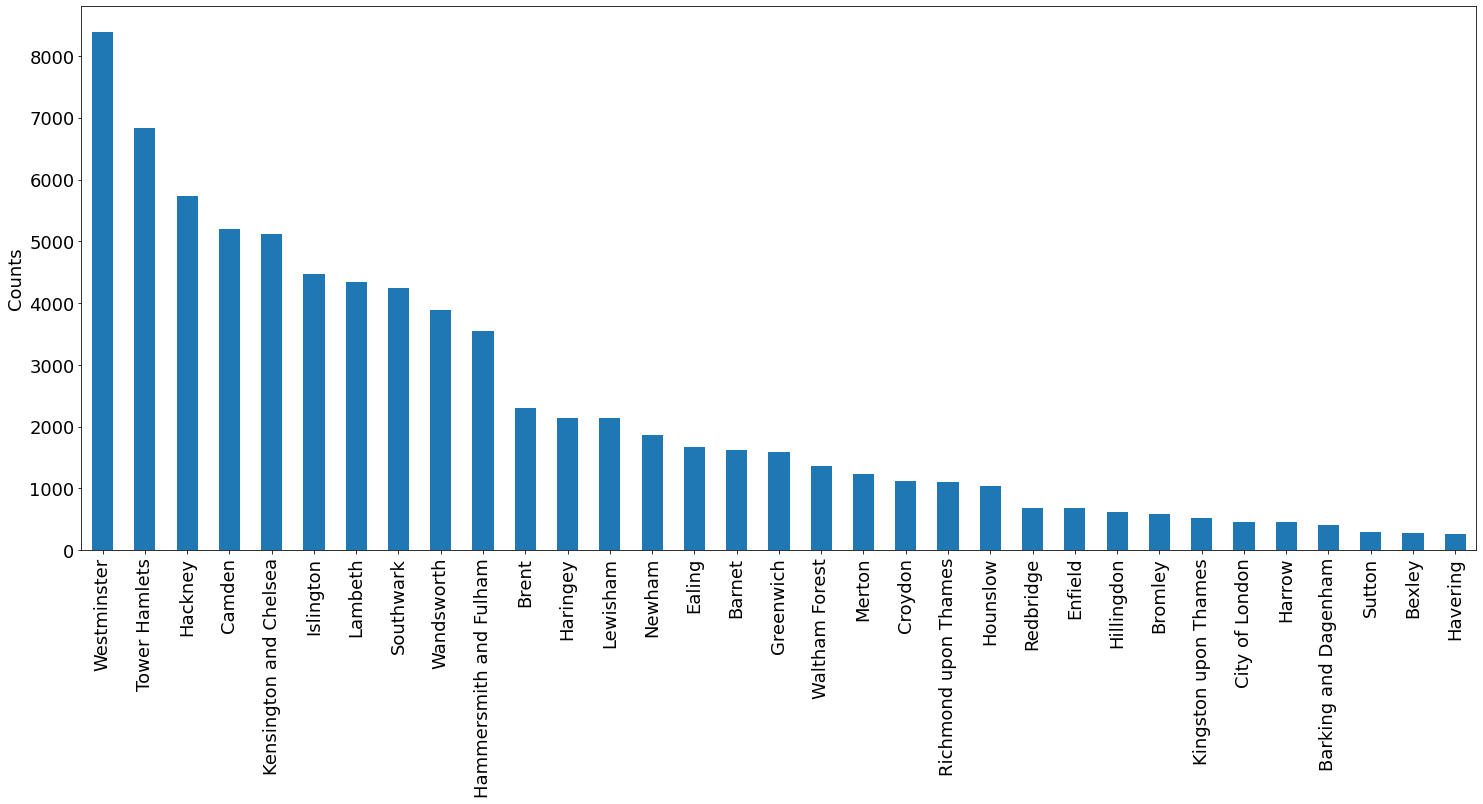

In [164]:
# London Boroughs
fig, ax = plt.subplots(figsize=(25, 10))
df_c['neighbourhood_cleansed'].value_counts().plot(kind='bar', ax=ax)
plt.ylabel('Counts')

Text(0, 0.5, 'Percentage %')

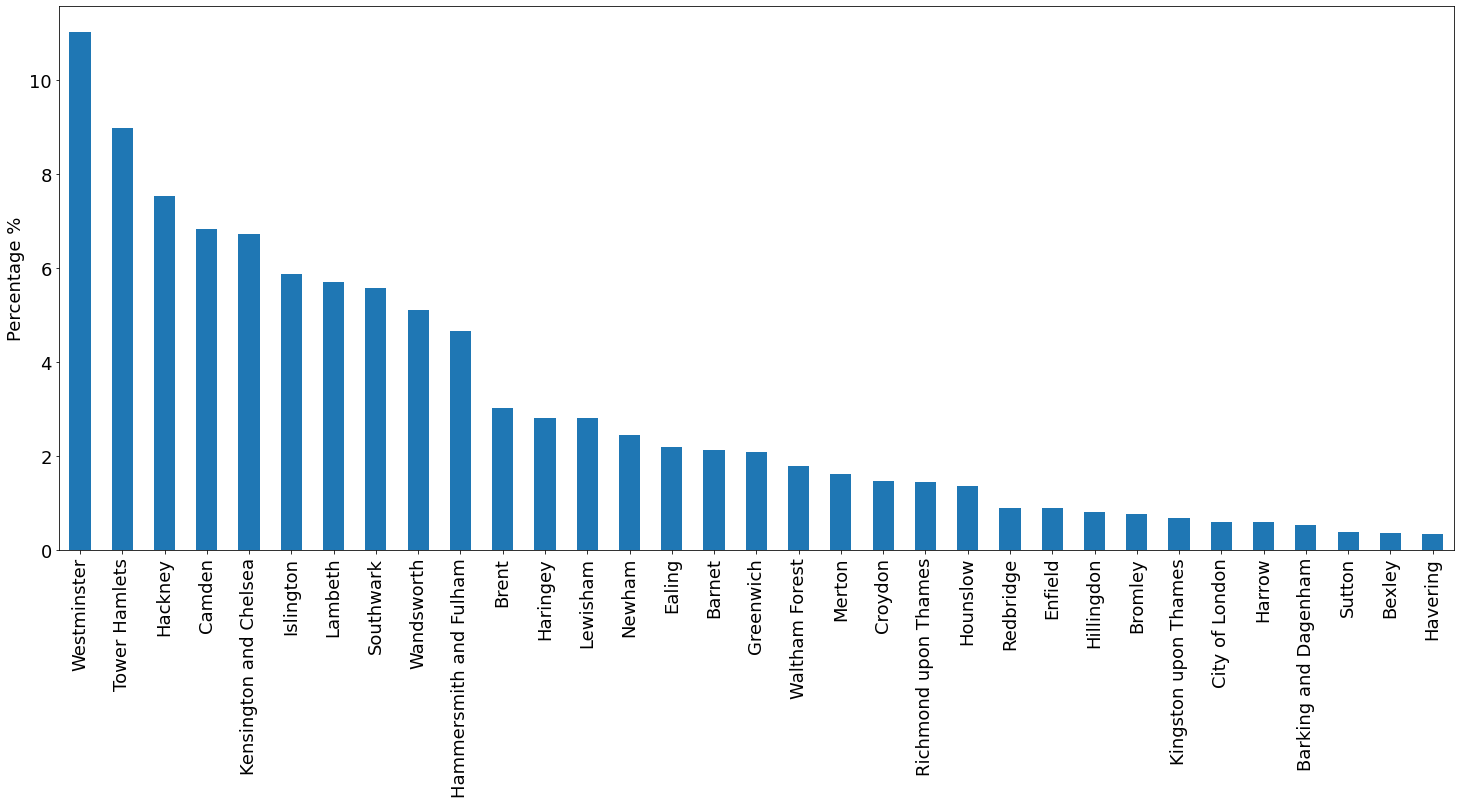

In [184]:
# London Boroughs
fig, ax = plt.subplots(figsize=(25, 10))
(df_c['neighbourhood_cleansed'].value_counts() / df_c['neighbourhood_cleansed'].value_counts().sum() * 100).plot(kind='bar', ax=ax)
plt.ylabel('Percentage %')

In [168]:
df_c_count_room_borough = df_c.groupby(['neighbourhood_cleansed', 'room_type'])['price'].count().to_frame('count')

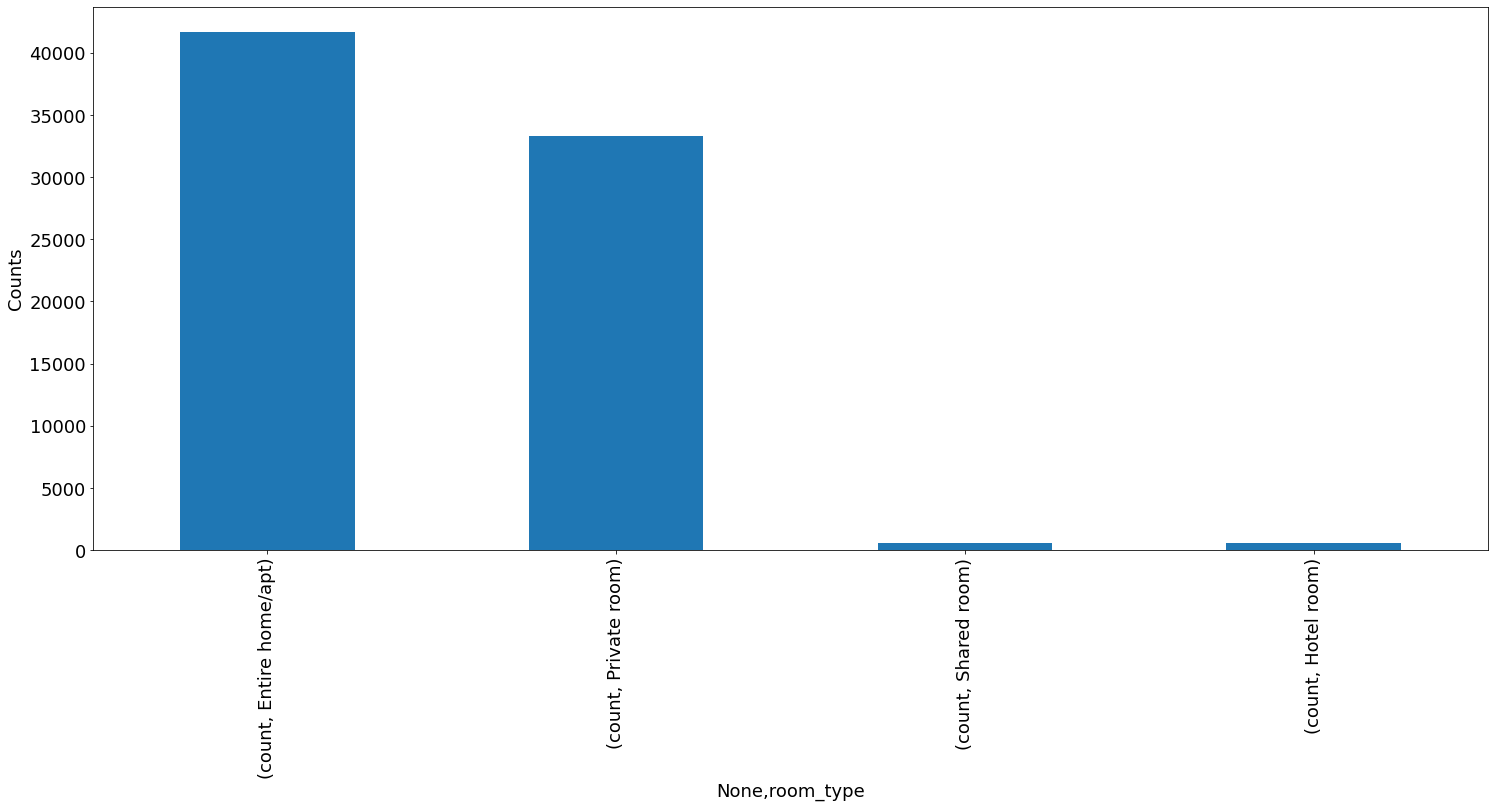

In [348]:
fig, ax = plt.subplots(figsize=(25, 10))
(df_c_count_room_borough.unstack().sum().sort_values(ascending=False)).plot(kind='bar', ax=ax)
plt.xticks(rotation=90)
plt.ylabel('Counts')
None

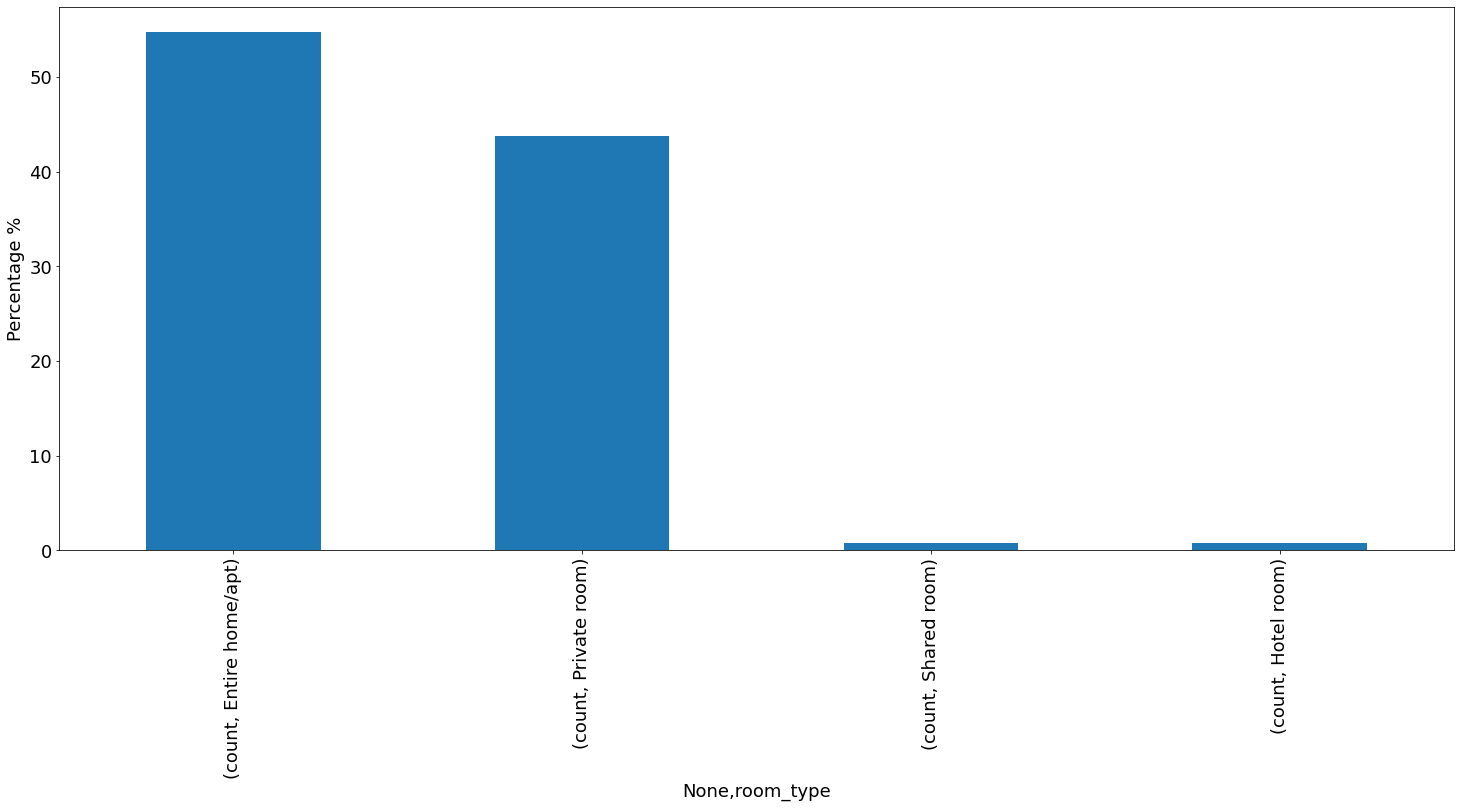

In [200]:
fig, ax = plt.subplots(figsize=(25, 10))
(df_c_count_room_borough.unstack().sum().sort_values(ascending=False)/ df_c_count_room_borough.unstack().sum().sort_values(ascending=False).sum() * 100).plot(kind='bar', ax=ax)
plt.xticks(rotation=90)
plt.ylabel('Percentage %')
None

In [294]:
color_01 = sns.color_palette('magma', n_colors=4, desat=.9)

In [372]:
color_01 = sns.color_palette("colorblind")

In [262]:
df_c_count_room_borough_asce = df_c_count_room_borough.unstack().sort_values(by=[('count', 'Entire home/apt'), ('count',    'Private room')], ascending=False)

In [280]:
list_order_desc_labels = list(df_c_count_room_borough_asce.index.get_level_values(0))

In [277]:
df_c_count_room_borough_asce.head()

count                                    
room_type              Entire home/apt Hotel room Private room Shared room
neighbourhood_cleansed                                                    
Westminster                     6077.0       83.0       2178.0        45.0
Kensington and Chelsea          3911.0      152.0       1000.0        49.0
Camden                          3363.0       68.0       1725.0        38.0
Tower Hamlets                   3226.0       34.0       3514.0        60.0
Hackney                         3112.0       12.0       2573.0        29.0

Looking at the split of the of properties at each Borough.

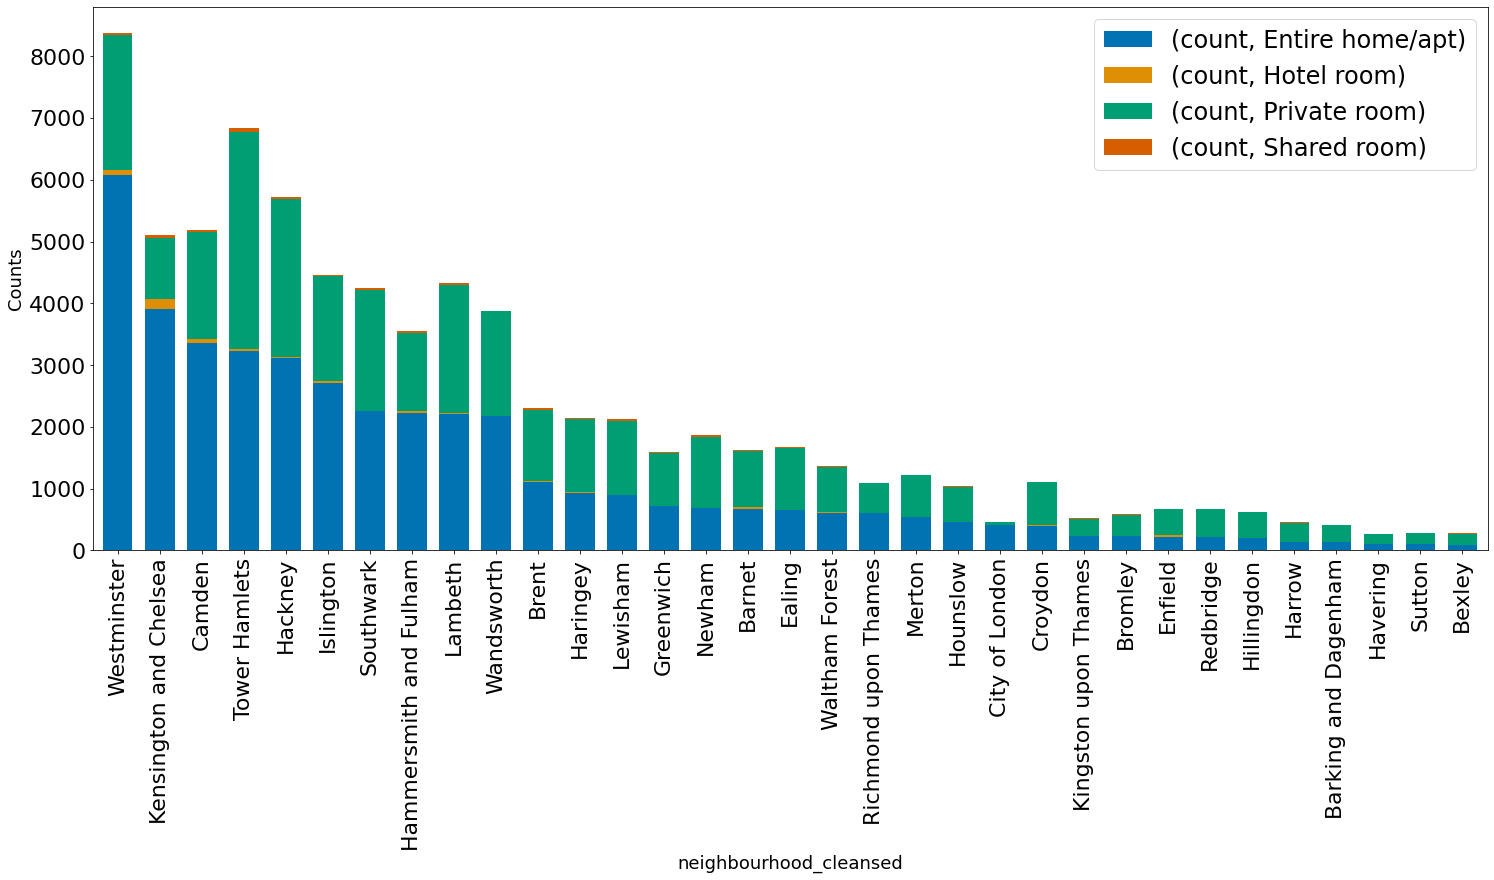

In [379]:
fig, ax = plt.subplots(figsize=(25, 10))
df_c_count_room_borough_asce.plot(kind='bar', ax=ax, stacked=True, width=0.7, color=color_01, fontsize=22)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.legend(prop={'size': 24})
None

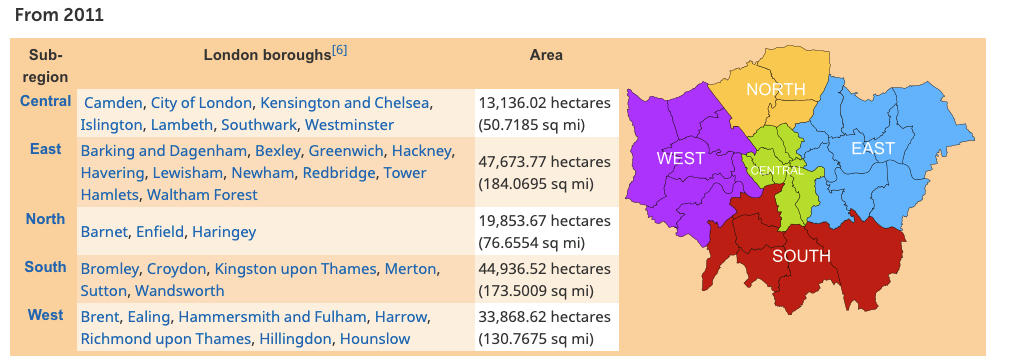

In [202]:
df_c_count_room_borough.unstack().sum()

       room_type      
count  Entire home/apt    41628.0
       Hotel room           556.0
       Private room       33338.0
       Shared room          592.0
dtype: float64

In [364]:
df_c_count_room_borough_per = (df_c_count_room_borough.unstack() / df_c_count_room_borough.unstack().sum() * 100).sort_values(by=[('count', 'Entire home/apt')], ascending=False)

In [365]:
df_c_count_room_borough_per.head()

count                                    
room_type              Entire home/apt Hotel room Private room Shared room
neighbourhood_cleansed                                                    
Westminster                  14.598347  14.928058     6.533085    7.601351
Kensington and Chelsea        9.395119  27.338129     2.999580    8.277027
Camden                        8.078697  12.230216     5.174276    6.418919
Tower Hamlets                 7.749592   6.115108    10.540524   10.135135
Hackney                       7.475737   2.158273     7.717919    4.898649

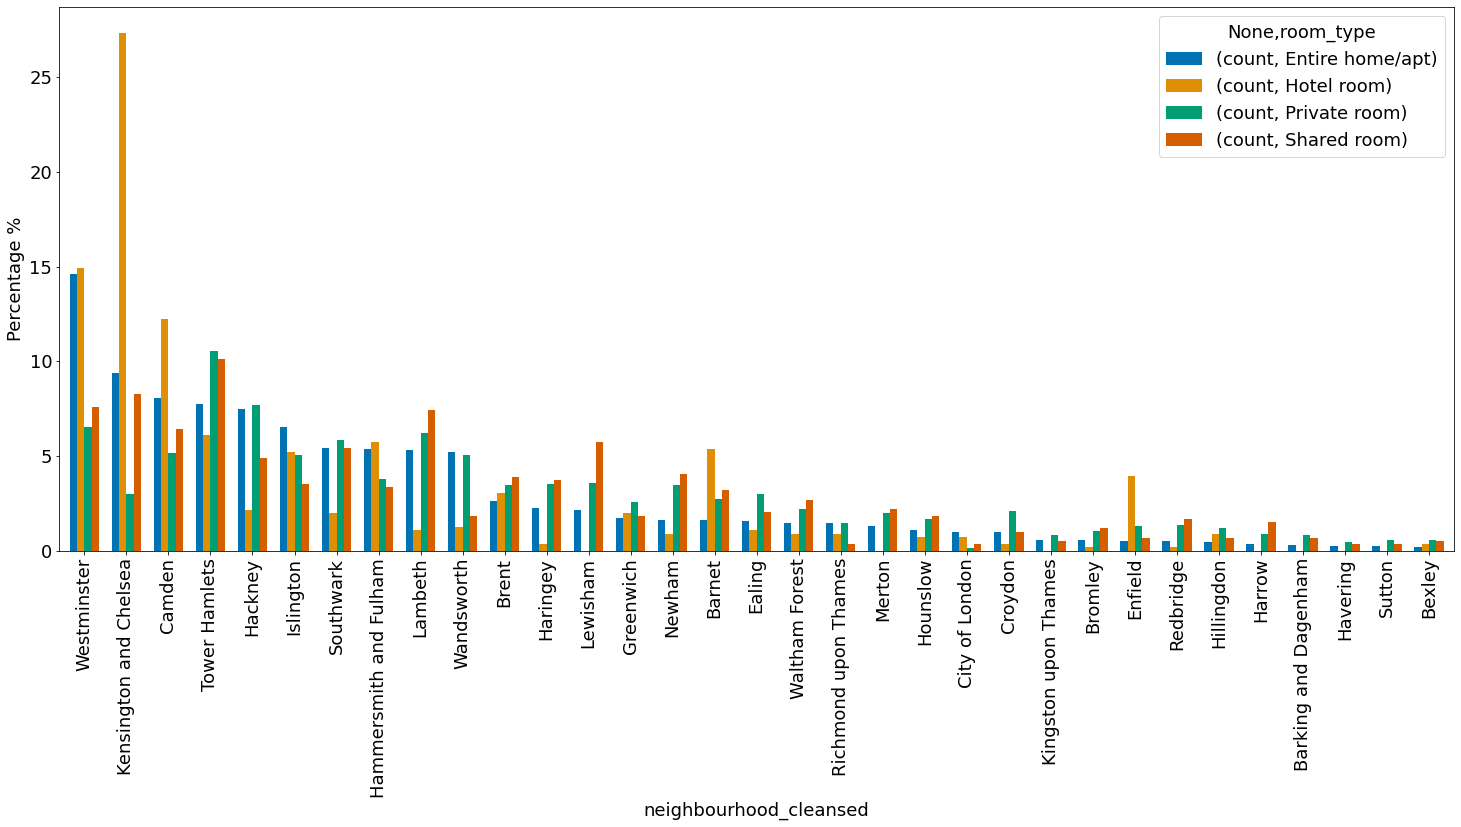

In [374]:
fig, ax = plt.subplots(figsize=(25, 10))
df_c_count_room_borough_per.plot(kind='bar', ax=ax, stacked=False, width=0.7, 
                                 color=color_01)
plt.xticks(rotation=90)
plt.ylabel('Percentage %')
None

Looking at the distributions of price per Borough.

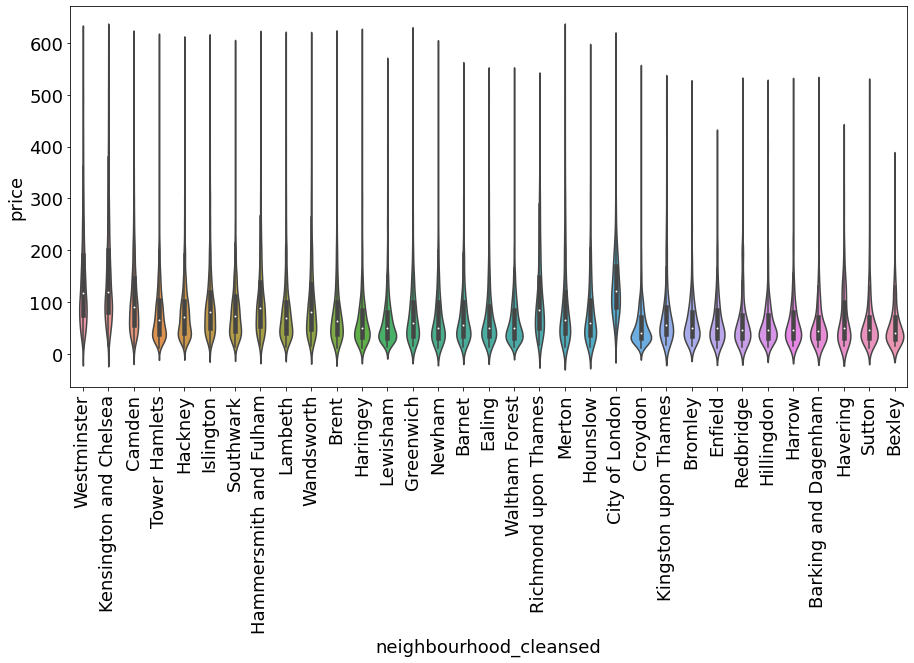

In [282]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.violinplot(x="neighbourhood_cleansed", y="price", data=df_c, order=list_order_desc_labels)
plt.xticks(rotation=90)
None

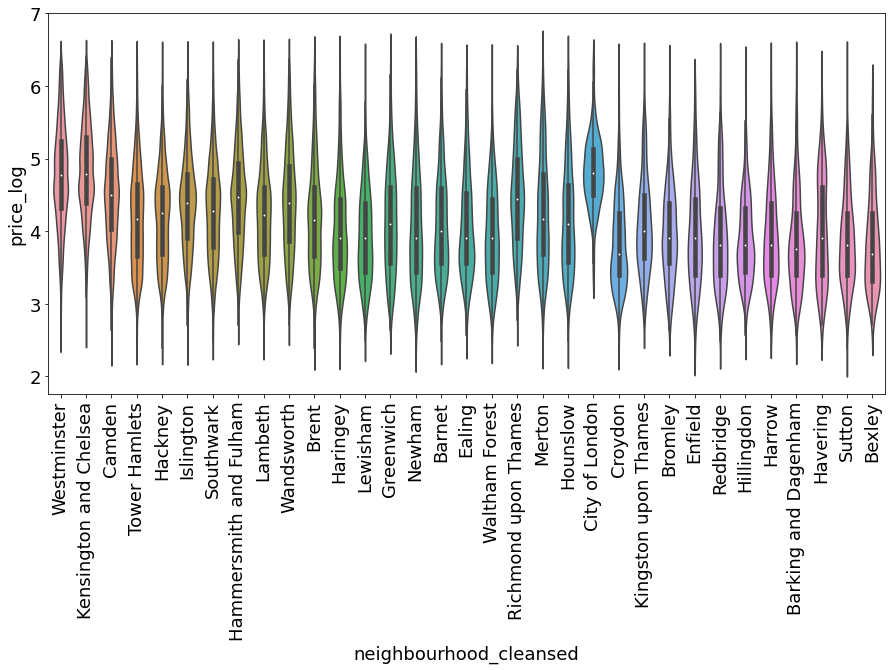

In [283]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.violinplot(x="neighbourhood_cleansed", y="price_log", data=df_c, order=list_order_desc_labels)
plt.xticks(rotation=90)
None

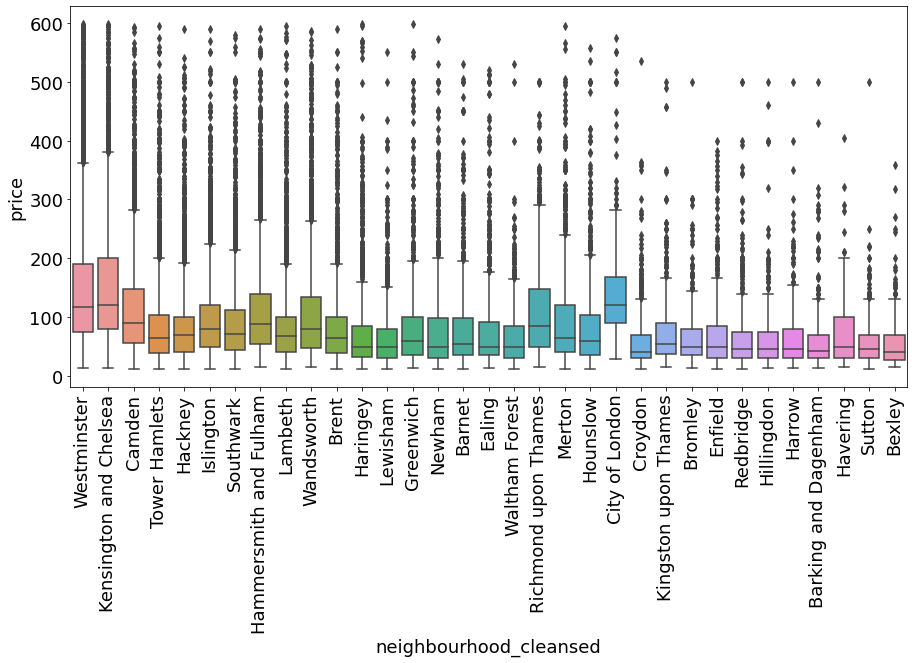

In [284]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="neighbourhood_cleansed", y="price", data=df_c, order=list_order_desc_labels)
plt.xticks(rotation=90)
None

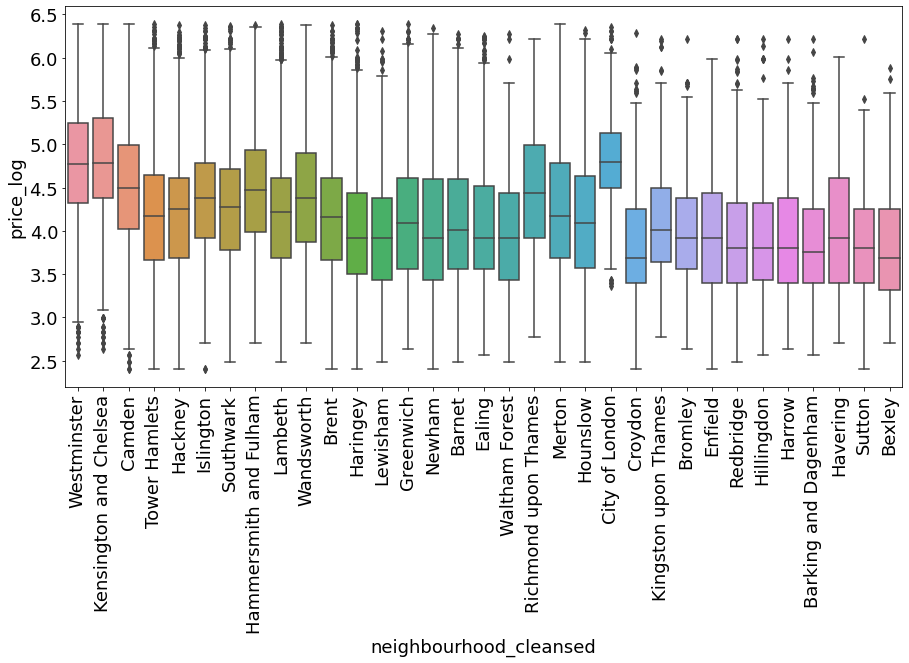

In [285]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="neighbourhood_cleansed", y="price_log", data=df_c, order=list_order_desc_labels)
plt.xticks(rotation=90)
None

In [277]:
np.log(600)/np.log(1000)

0.9260504167945479

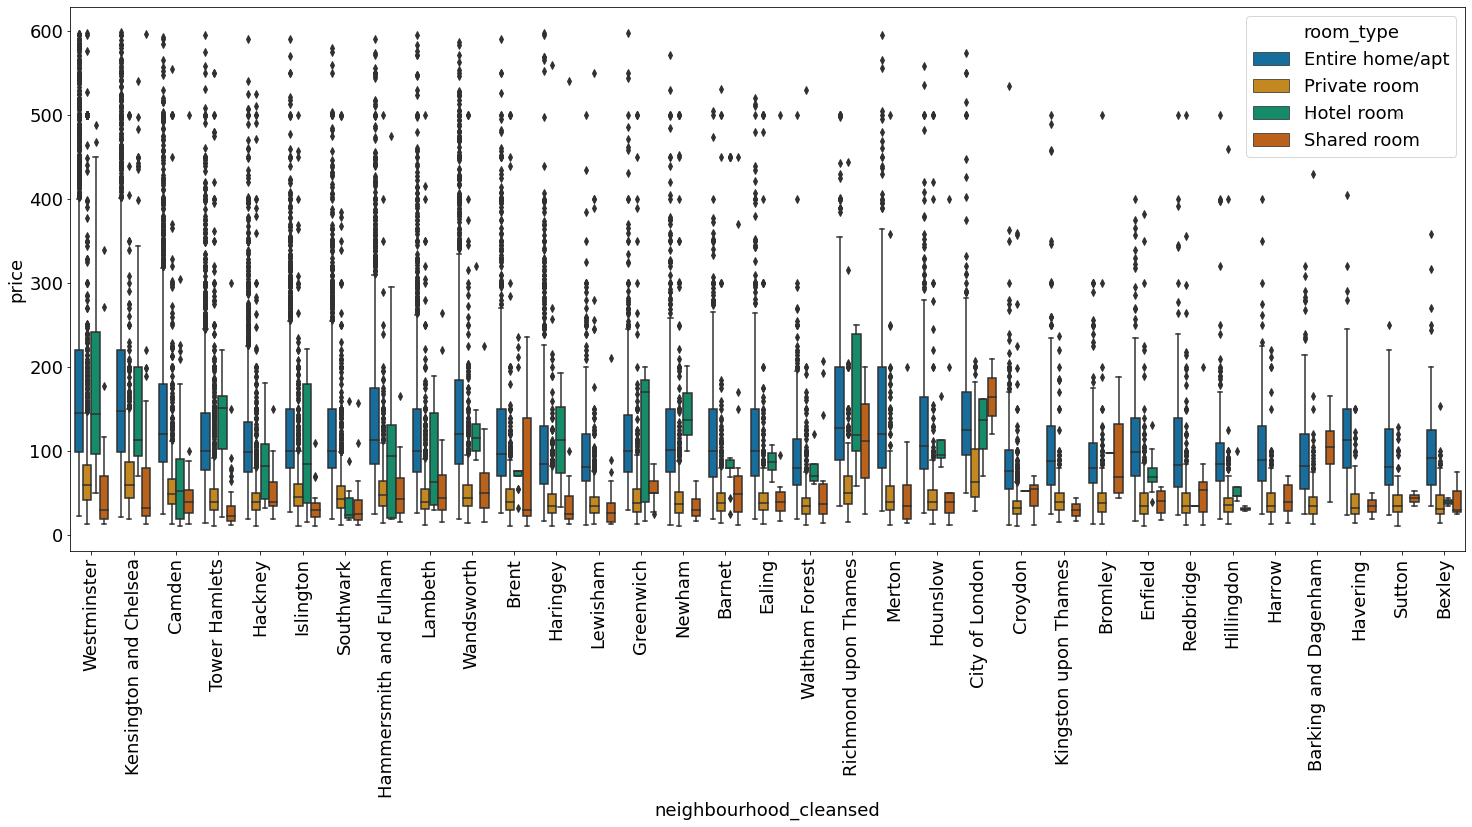

In [375]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x="neighbourhood_cleansed", y="price", hue='room_type', 
            data=df_c, order=list_order_desc_labels, palette=color_01)
plt.xticks(rotation=90)
None

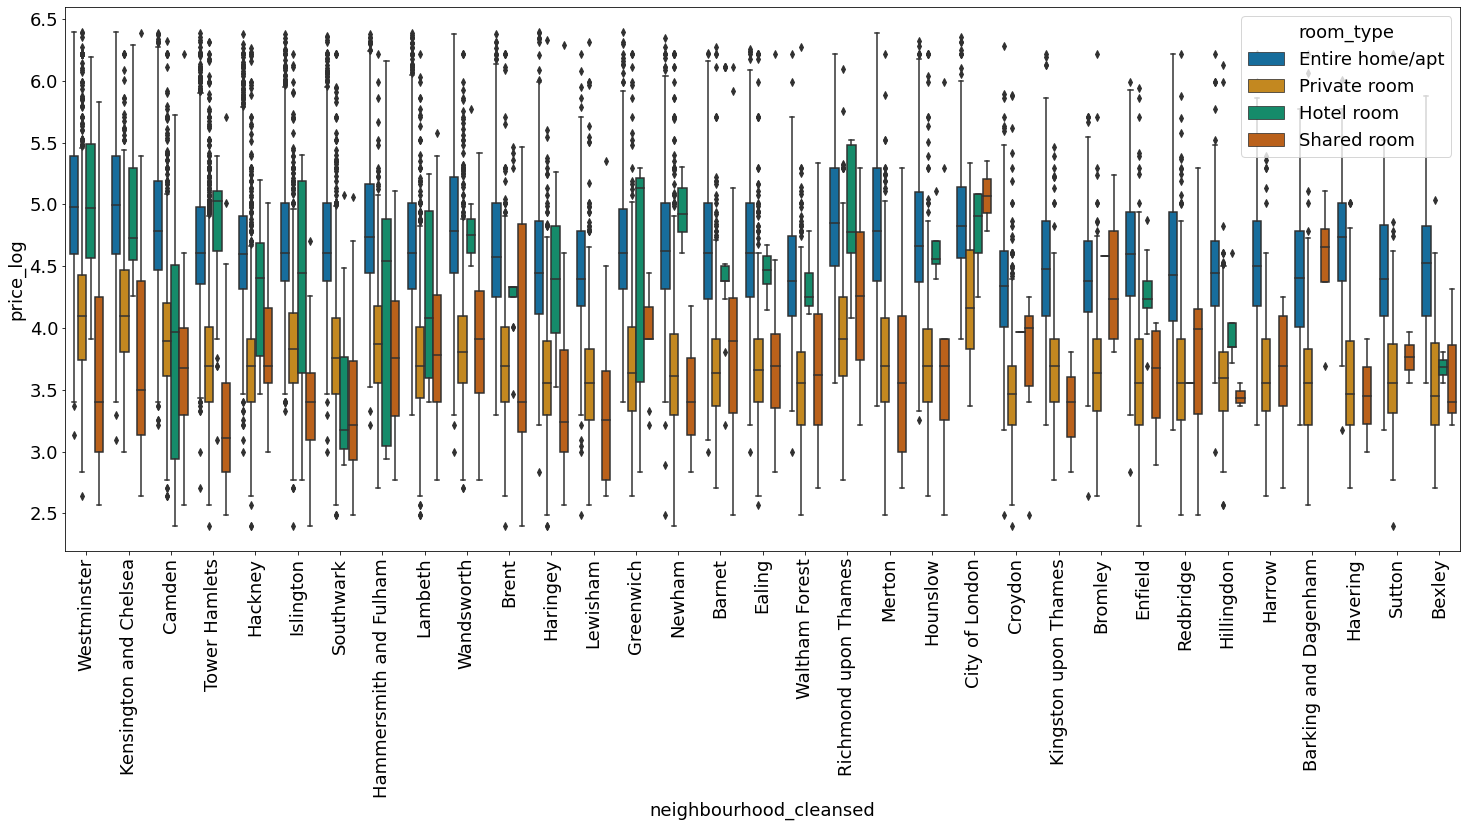

In [376]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x="neighbourhood_cleansed", y="price_log", hue='room_type', 
            data=df_c, order=list_order_desc_labels, palette=color_01)
plt.xticks(rotation=90)
None

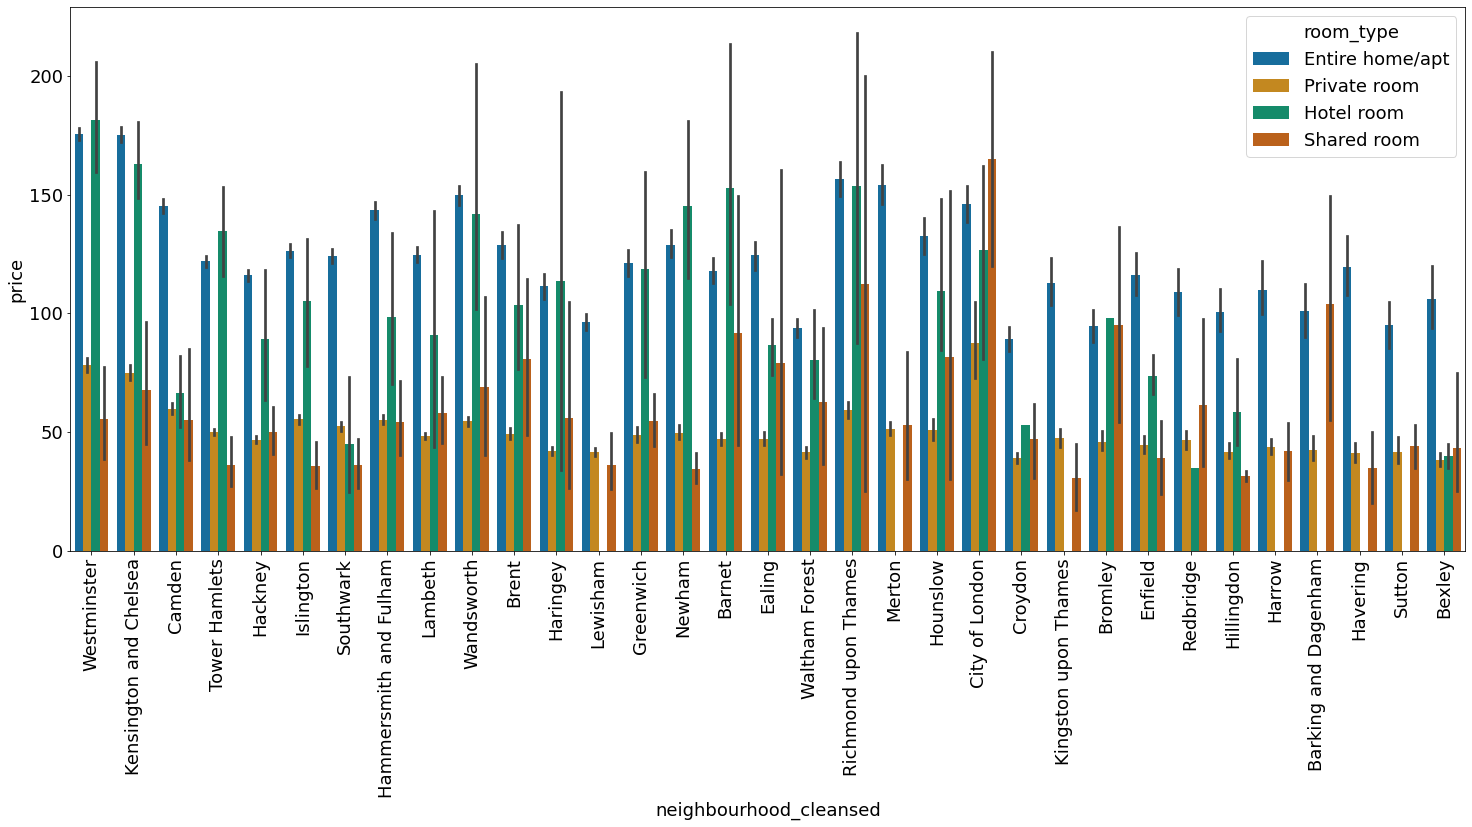

In [377]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="neighbourhood_cleansed", hue='room_type', y="price", 
            data=df_c, order=list_order_desc_labels, palette=color_01,
           orient='v')
plt.xticks(rotation=90)
None

Looking at reviews

In [337]:
color_02 = sns.color_palette('magma', n_colors=10, desat=.9)

In [338]:
df_c_rev_score_values_borough = df_c.groupby(['neighbourhood_cleansed', 'review_scores_value'])['price'].count().to_frame('count')

In [339]:
df_c_rev_score_values_borough_uns = df_c_rev_score_values_borough.unstack()
df_c_rev_score_values_borough_uns.head()

count                                                 
review_scores_value     2.0  3.0   4.0  5.0   6.0   7.0    8.0    9.0    10.0
neighbourhood_cleansed                                                       
Barking and Dagenham     3.0  NaN   NaN  1.0   3.0   4.0   25.0   62.0  123.0
Barnet                   7.0  NaN   5.0  1.0  20.0  16.0   74.0  246.0  615.0
Bexley                   2.0  NaN   1.0  1.0   3.0   NaN   11.0   31.0  106.0
Brent                    8.0  NaN  10.0  2.0  27.0  17.0  150.0  538.0  840.0
Bromley                  3.0  NaN   2.0  1.0   5.0   7.0   16.0   94.0  273.0

We can see that there are nulls. We already know from the missing data plot that about 30% of records are missing this score.

In [340]:
df_c_rev_score_values_borough_uns = df_c_rev_score_values_borough_uns.reindex(list_order_desc_labels)

In [349]:
fig, ax = plt.subplots(figsize=(30, 10))
df_c_rev_score_values_borough_uns.plot(kind='bar', ax=ax, stacked=True, width=0.7, 
                                   fontsize=22, color=color_02)
                                
plt.xticks(rotation=90)
plt.ylabel('Count')
None

In [342]:
df_c_rev_score_values_borough_uns_per = (df_c_rev_score_values_borough_uns / df_c_rev_score_values_borough_uns.sum() * 100)

In [343]:
df_c_rev_score_values_borough_uns_per.head()

count                                              \
review_scores_value          2.0        3.0        4.0        5.0        6.0    
neighbourhood_cleansed                                                          
Westminster             12.312312  14.285714  15.346535  20.588235  12.801014   
Kensington and Chelsea   8.708709  14.285714   8.415842  13.725490   6.970849   
Camden                   3.003003  14.285714   9.405941   4.901961   8.111534   
Tower Hamlets            9.609610  28.571429   8.910891  10.784314  11.787072   
Hackney                  3.003003  14.285714   2.970297   1.960784   5.449937   

                                                                   
review_scores_value          7.0        8.0        9.0       10.0  
neighbourhood_cleansed                                             
Westminster             16.571429  14.783790  13.895988  7.873875  
Kensington and Chelsea   9.714286   9.123840   8.078675  5.212182  
Camden                   9.285714   9.101200   8.545394  5.717975  
Tower Hamlets           11.285714  10.119991   9.789977  8.042472  
Hackney                  4.857143   5.207154   7.328592  8.695340

In [346]:
df_c_rev_score_values_borough_uns.sum()

       review_scores_value
count  2.0                      333.0
       3.0                        7.0
       4.0                      202.0
       5.0                      102.0
       6.0                      789.0
       7.0                      700.0
       8.0                     4417.0
       9.0                    17998.0
       10.0                   27877.0
dtype: float64

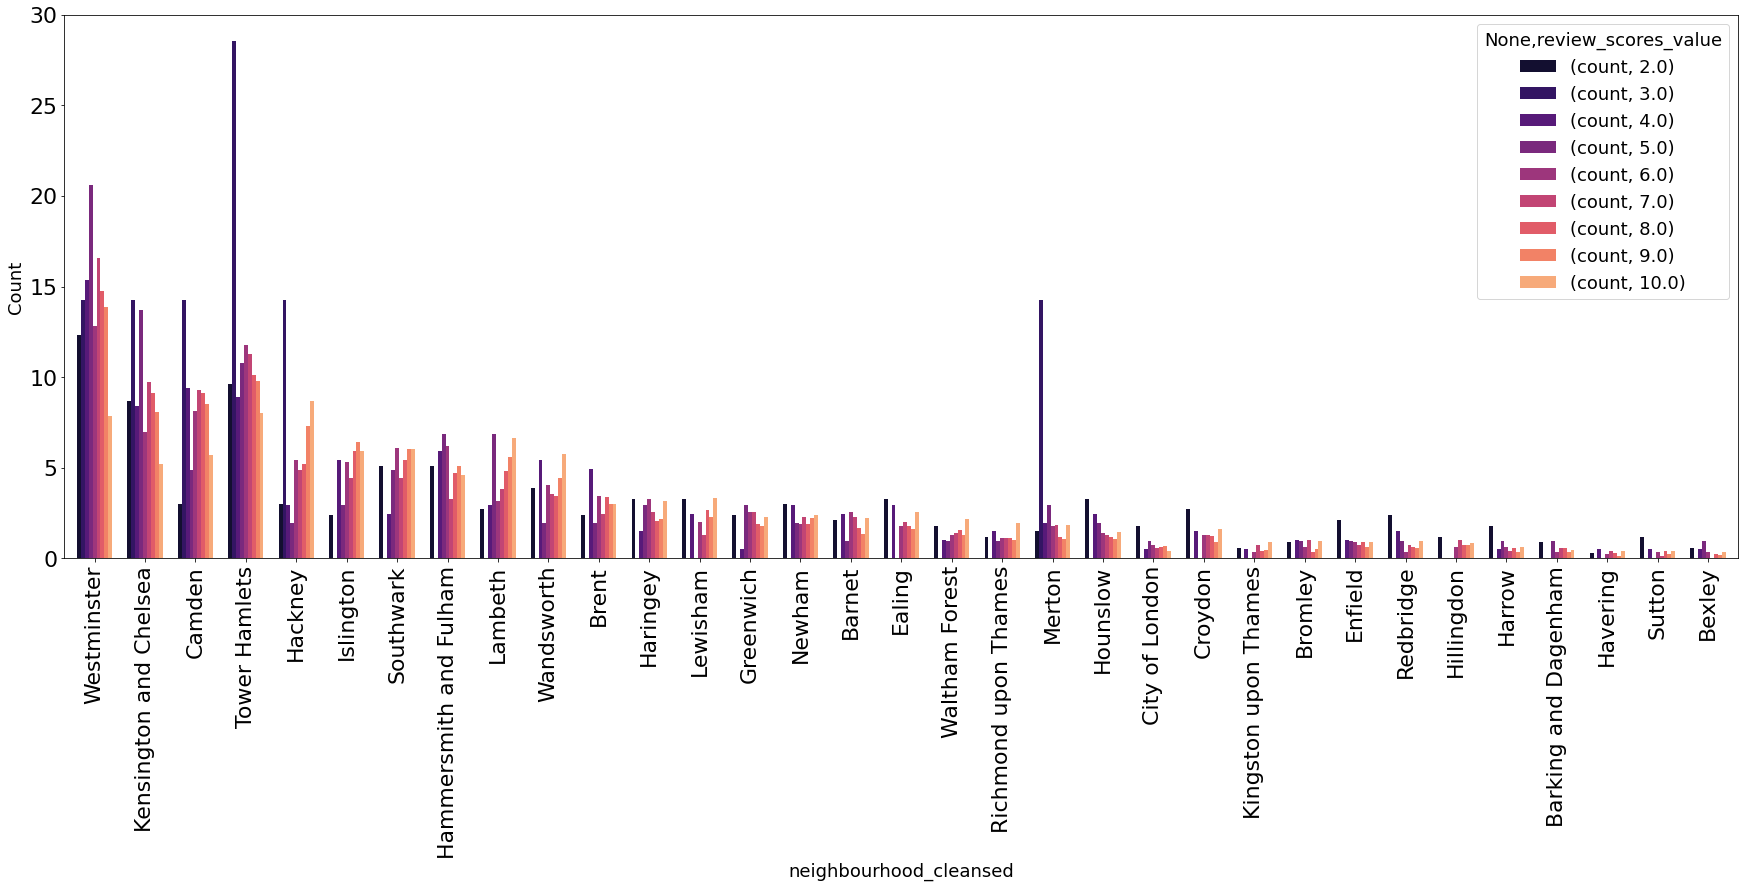

In [391]:
fig, ax = plt.subplots(figsize=(30, 10))
df_c_rev_score_values_borough_uns_per.plot(kind='bar', ax=ax, stacked=False, width=0.7, 
                                   fontsize=22, color=color_02)
                                
plt.xticks(rotation=90)
plt.ylabel('Count')
None

Looks like this score is distbuted proportional in each band wih the number of properties in each Borough.

In [356]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="review_scores_value", y="price", data=df_c, palette=color_02)
plt.xticks(rotation=90)
None

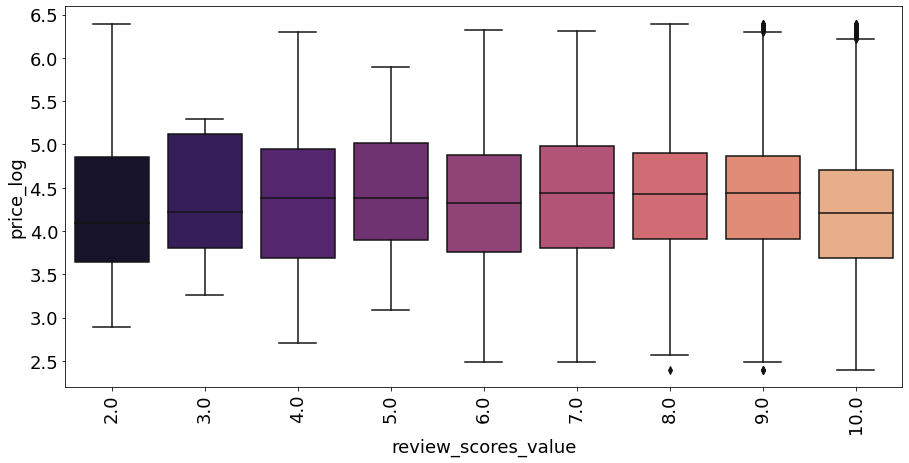

In [357]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="review_scores_value", y="price_log", data=df_c, palette=color_02)
plt.xticks(rotation=90)
None

In [359]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x="review_scores_value", y="price_log", hue='room_type', 
            data=df_c, palette=color_01)
plt.xticks(rotation=90)
None

The price is not changing across all the scores. Like more score value more expensive I coild have thought that could happen sometimes.  

In [287]:
df_c.shape

(76114, 113)

In [288]:
df_c['host_id'].nunique()

50654

In [290]:
df_c.columns

Index(['id', 'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_since', 'host_location', 'host_about',
       'host_response_time',
       ...
       'free_street_parking', 'bathtub', 'room_type_num',
       'months_since_first_reviews', 'months_with_reviews', 'months_as_host',
       'host_sice_YYYY', 'first_review_YYYY', 'last_review_YYYY', 'price_log'],
      dtype='object', length=113)

In [291]:
df_c[['months_since_first_reviews', 'months_with_reviews', 'months_as_host',
       'host_sice_YYYY', 'first_review_YYYY', 'last_review_YYYY']].describe()

months_since_first_reviews  months_with_reviews  months_as_host  \
count                54140.000000         54241.000000    76073.000000   
mean                    27.344403            16.860880       58.778936   
std                     25.043327            20.150501       28.012645   
min                      0.000000             0.000000        0.000000   
25%                      4.000000             1.000000       38.000000   
50%                     22.000000             9.000000       61.000000   
75%                     44.000000            26.000000       78.000000   
max                    141.000000           123.000000      148.000000   

       host_sice_YYYY  first_review_YYYY  last_review_YYYY  
count    76073.000000       54242.000000      54242.000000  
mean      2015.566324        2017.583238       2018.982781  
std          2.331693           1.800368          1.309584  
min       2008.000000        2009.000000       2011.000000  
25%       2014.000000        2016.000000       2018.000000  
50%       2015.000000        2018.000000       2019.000000  
75%       2017.000000        2019.000000       2020.000000  
max       2020.000000        2021.000000       2021.000000

In [ ]:
df_c.groupby('host_since_YYYY')['price'].count()

# Creating the 'overall_review_value' score metric

In [6]:
# This data set contains the the predicted price
df_l = pd.read_pickle(os.path.join(path_input, 'extended_data_set_pred_01_GA.pick'))

In [7]:
df_l.shape

(76114, 115)

In [8]:
## This data set cotains the clean and tranformed text varibles (Texthero_Text_processing notebok)
df_pca = pd.read_pickle(os.path.join(path_input, 'extended_data_set_pred_01_pca.pick'))

In [9]:
df_pca.shape

(76114, 135)

In [10]:
df_pca = df_pca.filter(['desccription_pca_x', 'desccription_pca_y', 
                        'neighborhood_overview_pca_x', 'neighborhood_overview_pca_y', 
                       'predicted_price_log_01', 'predicted_price_01'])

In [11]:
df_pca.head()

desccription_pca_x  desccription_pca_y  neighborhood_overview_pca_x  \
0           -0.207060           -0.071857                     0.115708   
1           -0.156919           -0.140670                     0.126038   
2           -0.078360           -0.289400                    -0.203779   
3           -0.065268           -0.359259                     0.042830   
4            0.018781            0.090359                     0.127126   

   neighborhood_overview_pca_y  predicted_price_log_01  predicted_price_01  
0                    -0.066403                4.345627           77.140373  
1                    -0.127408                3.829633           46.045658  
2                     0.033219                4.821026          124.092384  
3                    -0.185334                5.457325          234.469376  
4                    -0.166530                4.347158           77.258614

In [12]:
# Concatenating Data sets
df_pca_price_ga = pd.concat([df_l, df_pca], axis=1) 

In [13]:
df_pca_price_ga.shape

(76114, 121)

In [14]:
df_pca_price_ga.head()

id                                        description  \
0  11551  Unlike most rental apartments out there my fla...   
1  13913  My bright double bedroom with a large window h...   
2  15400  Lots of windows and light.  St Luke's Gardens ...   
3  17402  You'll have a wonderful stay in this superb mo...   
4  17506  Enjoy a chic stay in this elegant but fully mo...   

                               neighborhood_overview  \
0  Not even 10 minutes by metro from Victoria Sta...   
1  Finsbury Park is a friendly melting pot commun...   
2                                     It is Chelsea.   
3  Location, location, location! You won't find b...   
4  Fulham is 'villagey' and residential – a real ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7afccf4-18e5...    43039   
1  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
2  https://a0.muscache.com/pictures/428392/462d26...    60302   
3  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   
4  https://a0.muscache.com/pictures/11901327/e63d...    67915   

                                  host_url host_since  \
0  https://www.airbnb.com/users/show/43039 2009-10-03   
1  https://www.airbnb.com/users/show/54730 2009-11-16   
2  https://www.airbnb.com/users/show/60302 2009-12-05   
3  https://www.airbnb.com/users/show/67564 2010-01-04   
4  https://www.airbnb.com/users/show/67915 2010-01-05   

                         host_location  \
0      London, England, United Kingdom   
1      London, England, United Kingdom   
2  Kensington, England, United Kingdom   
3      London, England, United Kingdom   
4      London, England, United Kingdom   

                                          host_about  host_response_time  \
0  Hello, I'm a friendly Italian man with a very ...      within an hour   
1  I am a Multi-Media Visual Artist and Creative ...  within a few hours   
2  English, grandmother,  I have travelled quite ...                 NaN   
3  We are Liz and Jack.  We manage a number of ho...  a few days or more   
4  Named best B&B by The Times. Easy going hosts,...                 NaN   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0               100.0                  90.0                0.0   
1               100.0                  75.0                0.0   
2                 NaN                 100.0                0.0   
3                 0.0                 100.0                1.0   
4                 NaN                   NaN                0.0   

  host_neighbourhood  host_listings_count  host_total_listings_count  \
0            Brixton                  3.0                        3.0   
1    LB of Islington                  3.0                        3.0   
2            Chelsea                  1.0                        1.0   
3          Fitzrovia                 18.0                       18.0   
4             Fulham                  3.0                        3.0   

                                  host_verifications  \
0  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
1  ['email', 'phone', 'facebook', 'reviews', 'off...   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...   
3  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
4  ['email', 'phone', 'jumio', 'selfie', 'governm...   

                               neighbourhood  neighbourhood_cleansed  \
0                     London, United Kingdom                 Lambeth   
1  Islington, Greater London, United Kingdom               Islington   
2                     London, United Kingdom  Kensington and Chelsea   
3          London, Fitzrovia, United Kingdom             Westminster   
4                     London, United Kingdom  Hammersmith and Fulham   

   latitude  longitude              property_type        room_type  \
0  51.46225   -0.11732           Entire apartment  Entire home/apt   
1  51.56802   -0.11121  Private room in apartment     Private room   
2  51.48796   -0.16898           Ent

In [15]:
#  Metrics to consider for a wighted average
list_scores_reviews = [
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']

In [16]:
df_scores_rev = df_pca_price_ga[list_scores_reviews].copy()
df_scores_rev.head()

review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  91.0                     9.0                        9.0   
1                  97.0                    10.0                       10.0   
2                  96.0                    10.0                       10.0   
3                  94.0                    10.0                        9.0   
4                   NaN                     NaN                        NaN   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                     9.0   
1                   10.0                         10.0                     9.0   
2                   10.0                         10.0                    10.0   
3                    9.0                          9.0                    10.0   
4                    NaN                          NaN                     NaN   

   review_scores_value  
0                  9.0  
1                  9.0  
2                  9.0  
3                  9.0  
4                  NaN

In [17]:
# Number of recods missing
missing_featrues = mtool.missing_data_size(df_scores_rev, figsize=(12, 5))

In [18]:
# Percetage of recods missing
missing_feature_percetage = mtool.missing_data_percentage(df_scores_rev, missing_featrues, figsize=(12, 5))

In [19]:
missing_feature_percetage

Total    Percent  total not missing
review_scores_checkin        23689  31.123052              52425
review_scores_value          23689  31.123052              52425
review_scores_location       23688  31.121738              52426
review_scores_accuracy       23642  31.061303              52472
review_scores_communication  23640  31.058675              52474
review_scores_cleanliness    23633  31.049478              52481
review_scores_rating         23583  30.983787              52531

In [45]:
# Removing records where all the features are missing at the same time
mask = ((df_pca_price_ga['review_scores_checkin'].isnull()) & 
        (df_pca_price_ga['review_scores_value'].isnull()) & 
        (df_pca_price_ga['review_scores_location'].isnull()) & 
        (df_pca_price_ga['review_scores_accuracy'].isnull()) & 
        (df_pca_price_ga['review_scores_communication'].isnull()) & 
        (df_pca_price_ga['review_scores_cleanliness'].isnull()) & 
        (df_pca_price_ga['review_scores_rating'].isnull()))

In [46]:
df_l_scores_r = df_pca_price_ga[~mask].copy()

In [47]:
df_l_scores_r.shape

(52534, 121)

In [48]:
# 68% of records will be used in the second model from the original data set
df_l_scores_r.shape[0] / df.shape[0] * 100

68.10568346816012

In [49]:
# 69% of records will be used in the second model w.r.t the ones used in model 1
df_l_scores_r.shape[0] / df_pca_price_ga.shape[0] * 100

69.02015397955698

In [50]:
df_l_scores_r[list_scores_reviews].head(10)

review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                   91.0                     9.0                        9.0   
1                   97.0                    10.0                       10.0   
2                   96.0                    10.0                       10.0   
3                   94.0                    10.0                        9.0   
5                   96.0                    10.0                       10.0   
6                   90.0                     9.0                       10.0   
7                   96.0                    10.0                       10.0   
8                   97.0                    10.0                       10.0   
9                   97.0                    10.0                        9.0   
10                  96.0                    10.0                       10.0   

    review_scores_checkin  review_scores_communication  \
0                    10.0                         10.0   
1                    10.0                         10.0   
2                    10.0                         10.0   
3                     9.0                          9.0   
5                    10.0                         10.0   
6                    10.0                         10.0   
7                    10.0                         10.0   
8                    10.0                         10.0   
9                    10.0                         10.0   
10                   10.0                         10.0   

    review_scores_location  review_scores_value  
0                      9.0                  9.0  
1                      9.0                  9.0  
2                     10.0                  9.0  
3                     10.0                  9.0  
5                      9.0                 10.0  
6                     10.0                  8.0  
7                     10.0                  9.0  
8                     10.0                 10.0  
9                     10.0                 10.0  
10                     9.0                 10.0

In [51]:
df_l_scores_r[list_scores_reviews].describe()

review_scores_rating  review_scores_accuracy  \
count          52531.000000            52472.000000   
mean              93.055091                9.527119   
std               10.506298                1.031211   
min               20.000000                2.000000   
25%               90.000000                9.000000   
50%               96.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               52481.000000           52425.000000   
mean                    9.284732               9.650205   
std                     1.184441               0.929281   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                 52474.000000            52426.000000   
mean                      9.671190                9.556976   
std                       0.925077                0.868308   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  
count         52425.000000  
mean              9.303329  
std               1.075355  
min               2.000000  
25%               9.000000  
50%              10.000000  
75%              10.000000  
max              10.000000

In [52]:
df_l_scores_r[list_scores_reviews] = df_l_scores_r[list_scores_reviews].fillna(0)

In [53]:
# Scaling all the scores between 1 to 100 (just review_scores_rating is between this rage)
list_var_scaled = []
for col in list_scores_reviews[1:]:
    df_l_scores_r[col + '_scaled'] = df_l_scores_r[col] * 10
    list_var_scaled.append(col + '_scaled') 

In [54]:
df_l_scores_r[['review_scores_rating'] + list_var_scaled].describe()

review_scores_rating  review_scores_accuracy_scaled  \
count          52534.000000                   52534.000000   
mean              93.049777                      95.158754   
std               10.529505                      10.812663   
min                0.000000                       0.000000   
25%               90.000000                      90.000000   
50%               96.000000                     100.000000   
75%              100.000000                     100.000000   
max              100.000000                     100.000000   

       review_scores_cleanliness_scaled  review_scores_checkin_scaled  \
count                      52534.000000                  52534.000000   
mean                          92.753645                     96.301824   
std                           12.199880                     10.269361   
min                            0.000000                      0.000000   
25%                           90.000000                    100.000000   
50%                          100.000000                    100.000000   
75%                          100.000000                    100.000000   
max                          100.000000                    100.000000   

       review_scores_communication_scaled  review_scores_location_scaled  \
count                        52534.000000                   52534.000000   
mean                            96.601439                      95.373282   
std                              9.805584                       9.694307   
min                              0.000000                       0.000000   
25%                            100.000000                      90.000000   
50%                            100.000000                     100.000000   
75%                            100.000000                     100.000000   
max                            100.000000                     100.000000   

       review_scores_value_scaled  
count                52534.000000  
mean                    92.840256  
std                     11.546433  
min                      0.000000  
25%                     90.000000  
50%                    100.000000  
75%                    100.000000  
max                    100.000000

In [59]:
df_l_scores_r.isnull().any().to_frame().T

id  description  neighborhood_overview  picture_url  host_id  host_url  \
0  False         True                   True        False    False     False   

   host_since  host_location  host_about  host_response_time  \
0        True           True        True                True   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                True                  True               True   

   host_neighbourhood  host_listings_count  host_total_listings_count  \
0                True                 True                       True   

   host_verifications  neighbourhood  neighbourhood_cleansed  latitude  \
0               False           True                   False     False   

   longitude  property_type  room_type  accommodates  bedrooms  beds  \
0      False          False      False         False      True  True   

   amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  \
0      False  False           False           False                   False   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                   False                   False                   False   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  has_availability  \
0                   False                   False             False   

   availability_30  availability_60  availability_90  availability_365  \
0            False            False            False             False   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0              False                  False                   False   

   first_review  last_review  review_scores_rating  review_scores_accuracy  \
0         False        False                 False                   False   

   review_scores_cleanliness  review_scores_checkin  \
0                      False                  False   

   review_scores_communication  review_scores_location  review_scores_value  \
0                        False                   False                False   

   instant_bookable  calculated_host_listings_count  \
0             False                           False   

   calculated_host_listings_count_entire_homes  \
0                                        False   

   calculated_host_listings_count_private_rooms  \
0                                         False   

   calculated_host_listings_count_shared_rooms  reviews_per_month  bathrooms  \
0                                        False              False       True   

   bathrooms_shared  number_amenities  amenities_1   wifi  heating  \
0              True             False        False  False    False   

   essentials  kitchen  smoke_alarm  washer  hangers   iron     tv  \
0       False    False        False   False    False  False  False   

   hair_dryer  shampoo  dedicated_workspace  carbon_monoxide_alarm  hot_water  \
0       False    False                False                  False      False   

   dryer  refrigerator  dishes_and_silverware  cooking_basics   oven  \
0  False         False                  False           False  False   

   bed_linens  microwave  stove  fire_extinguisher  first_aid_kit  \
0       False      False  False              False          False   

   private_entrance  dishwasher  coffee_maker  long_term_stays_allowed  \
0             False       False         False                    False   

   elevator  free_parking_on_premises  extra_pillows_and_blankets  \
0     False                     False                       False   

   lock_on_bedroom_door  host_greets_you  cable_tv  luggage_dropoff_allowed  \
0                 False            False     False                    False   

   patio_or_balcony  garden_or_backyard  breakfast  paid_parking_off_premises  \
0             False               False      False                      False   

   lockbox  free_street_parking  bathtub  room_type_num  \
0    False                False    False          False   

   months_since_first_reviews  m

A reminder of how to improve the chances for a listing to be ranked at the top [Ref 1](https://airbnbsmart.com/airbnb-ranking-strategy/):

* Pricing (it has the biggest overall impact on number of booking a listing will receive)
* Compleatness of the information on the listig (100% filled), and quality of the accuraccy of it.
* Quantity of images at least 15-20. the Airbnb algorithm thinks it is more accurrately representing the property, and therefore the experience.
* Good quality of pictures (higher resolutino).
* Image captions that is unique and not duplicated in other part.
* Quality and quantity of reviews
* Verification level
* airbnb host profile
* Instant book
* Minimum nightly stay
* host response time
* Location
* Vlick thorugh rate (number of clicks of guest)
* Time on listing page
* Booking rate (percentage of successful bookings in relation to the number of views a listing receives.)


**Weighted average**

1. We will give more wieght to the score that represent the best value of the market (price ans service): review_score_value. (30%)
2. The second the more accurate in providing the information of the listing:review_score_accuraccy. (20%)
3. The third will be the host response time: review_score_communication (15%)
4. The overall satisfaction: review_score_rating (10%)
5. the cleanless: review_scores_cleanliness (10%)
6. location (10%)
7. Check in time is not that important: review_score_checkin (5%)


In [60]:
list_scores_reviews = [
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']

In [61]:
df_l_scores_r['overall_review_value'] = (df_l_scores_r['review_scores_value_scaled'] * 0.3 +
                                         df_l_scores_r['review_scores_accuracy_scaled'] * .2 +
                                         df_l_scores_r['review_scores_communication_scaled'] * .15 +
                                         df_l_scores_r['review_scores_rating'] * .1 +
                                         df_l_scores_r['review_scores_cleanliness_scaled'] * .1 +
                                         df_l_scores_r['review_scores_checkin_scaled'] * .1)

In [62]:
df_l_scores_r[list_scores_reviews + ['overall_review_value']].head()

review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  91.0                     9.0                        9.0   
1                  97.0                    10.0                       10.0   
2                  96.0                    10.0                       10.0   
3                  94.0                    10.0                        9.0   
5                  96.0                    10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                     9.0   
1                   10.0                         10.0                     9.0   
2                   10.0                         10.0                    10.0   
3                    9.0                          9.0                    10.0   
5                   10.0                         10.0                     9.0   

   review_scores_value  overall_review_value  
0                  9.0                  88.1  
1                  9.0                  91.7  
2                  9.0                  91.6  
3                  9.0                  87.9  
5                 10.0                  94.6

In [63]:
df_l_scores_r['overall_review_value'].describe()

count    52534.000000
mean        89.584568
std          9.001203
min          2.000000
25%         87.900000
50%         92.000000
75%         94.900000
max         95.000000
Name: overall_review_value, dtype: float64

In [64]:
df_l_scores_r['overall_review_value'].isnull().any()

False

In [65]:
df_l_scores_r['host_number_verifications'] = df_l_scores_r['host_verifications'].apply(lambda x: len(x))

In [66]:
df_l_scores_r['host_response_time'].value_counts(dropna=False)

NaN                   25594
within an hour        14519
within a few hours     5668
within a day           4783
a few days or more     1970
Name: host_response_time, dtype: int64

In [67]:
# Map value increasing with time
map_host_response = {'within an hour':1, 'within a few hours':2, 'within a day':3, 'a few days or more':4}

In [68]:
df_l_scores_r['host_response_time_category'] = df_l_scores_r['host_response_time'].map(map_host_response)

In [69]:
df_l_scores_r['host_response_time_category'].value_counts(dropna=False)

NaN    25594
1.0    14519
2.0     5668
3.0     4783
4.0     1970
Name: host_response_time_category, dtype: int64

In [70]:
df_l_scores_r.iloc[0].to_clipboard()

In [73]:
# It is skewed
mtool.plotting_one_dist_norm_kde(df_l_scores_r, 'overall_review_value')
None

In [111]:
mtool.stats_summary(df_l_scores_r[['overall_review_value']]).T

overall_review_value
count           52534.000000
mean               89.584568
std                 9.001203
min                 2.000000
25%                87.900000
50%                92.000000
75%                94.900000
max                95.000000
median             92.000000
skew               -4.363099
kurt               26.438822

In [100]:
df_l_scores_r[df_l_scores_r['overall_review_value'] < 40].shape

(407, 131)

In [112]:
df_l_scores_r.loc[df_l_scores_r['overall_review_value'] < 60].shape[0] / df_l_scores_r.shape[0] * 100

1.7588609281608103

In [89]:
mtool.plotting_one_dist_norm_kde(df_l_scores_r.loc[df_l_scores_r['overall_review_value'] > 60],
                                 'overall_review_value')
None

In [115]:
mtool.stats_summary(df_l_scores_r.loc[df_l_scores_r['overall_review_value'] > 60, ['overall_review_value']]).T

overall_review_value
count           51581.000000
mean               90.496212
std                 5.640002
min                60.500000
25%                88.100000
50%                92.000000
75%                94.900000
max                95.000000
median             92.000000
skew               -1.951653
kurt                4.799616

In [75]:
# Expliring distribution when tranformed to log
df_l_scores_r['overall_review_value_log'] = np.log(df_l_scores_r['overall_review_value'])

In [96]:
mtool.plotting_one_dist_norm_kde(df_l_scores_r, 'overall_review_value_log')
None

The ditributions is skewed, and the outiers are not removed. I want the model also learns how poor reviews looks like. I want that or model also tell us informtation of that segment which is small. 

In [72]:
# df_l_scores_r.to_pickle(os.path.join(path_input, 'extended_data_set_pred_01_GA_pca.pick'))